# <p style="padding:10px;background-color:#85BB65;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">BIG MART SALES PREDICTION</p>

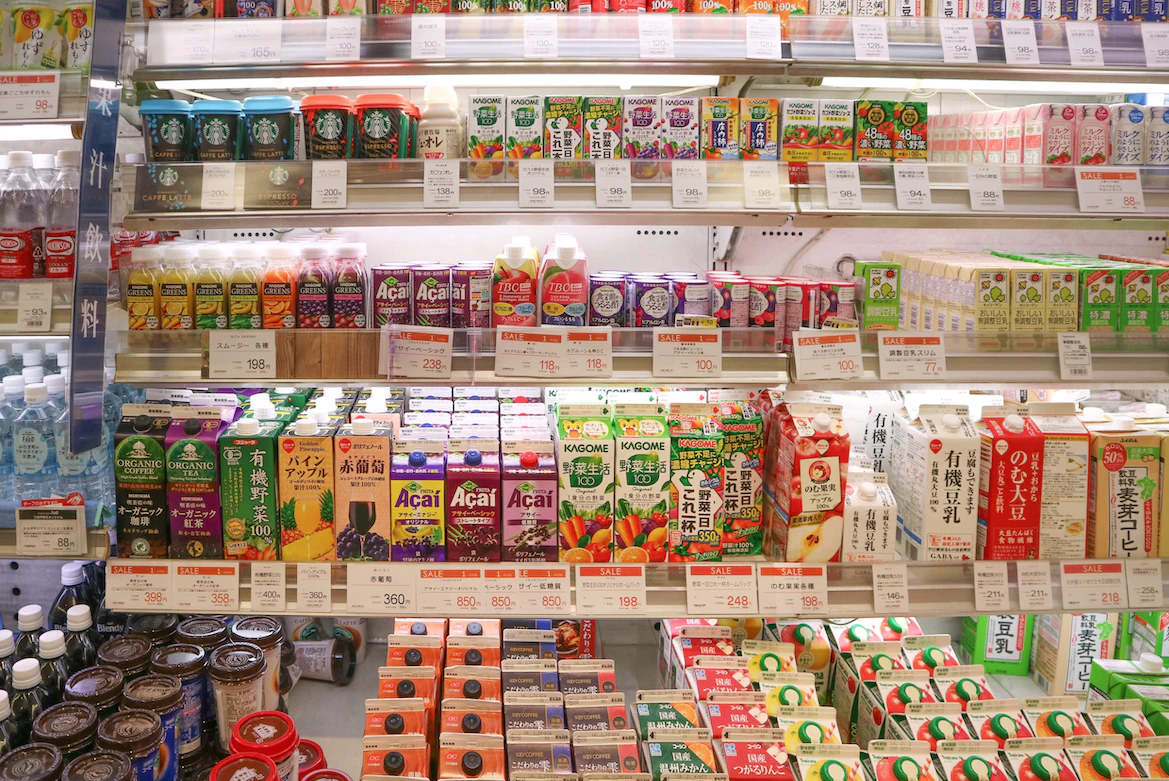

# <span style="color:blue"> Table of Contents</span>

0. [Problem Statement](#problem_statement)
1. [AIM](#AIM)
2. [Data Dictionary](#data_dictionary)
3. [Import Libraries](#import_libraries)
4. [Exploratory Data Analysis](#eda)
    1. [Data Cleaning](#data_cleaning)
    2. [Descriptive Statistics](#descriptive_statistics)
    3. [Univariate Analysis](#univariate_analysis)
    4. [Bivariate and Multivariate Analysis](#bivariate_multivariate_analysis)
    5. [Missing Value Treatment](#missing_value_treatment)
    6. [Outliers Analysis](#outliers_analysis)
    7. [Data Scaling and Transformation](#data_scaling_transformation)
    8. [Train and Test Split](#train_test_split)
5. [Model Building](#model_building)
    1. [Linear Regression](#Linear_regression)
6. [Compare Model Performances](#score_summary)
7. [Conclusion](#conclusion)

# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">0. Problem Statement <a id="problem_statement"></a></mark>**

### Develop a machine learning model to predict the sales of individual products at various BigMart stores. This model should utilize historical sales data, product attributes, and store information to provide accurate sales. The goal is to optimize inventory management, stocking, and overall sales strategy for improved profitability and customer satisfaction.

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">1.AIM<a id="AIM"></a></mark>**

### Develop a machine learning model that can predict the sales of individual products in different BigMart stores.Use historical sales data, product information, and store attributes to train the model.Optimize the model's performance to minimize the mean squared error (MSE) or other relevant evaluation metrics.Provide insights and recommendations for inventory management and sales strategy based on the model's predictions.

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">2. Data Dictionary<a id="data_dictionary"></a></mark>**  

#### 'Item_Identifier': An identifier for each specific item.

#### 'Item_Weight': The weight of the item.

#### 'Item_Fat_Content': The fat content of the item.

#### 'Item_Visibility': The visibility of the item in the store.

#### 'Item_Type': The type/category of the item.

#### 'Item_MRP': The Maximum Retail Price of the item.(in dollar)

#### 'Outlet_Identifier': An identifier for the specific outlet or store.

#### 'Outlet_Establishment_Year': The year the outlet was established.

#### 'Outlet_Size': The size of the outlet.

#### 'Outlet_Location_Type': The location type of the outlet.

#### 'Outlet_Type': The type of outlet.

#### 'Item_Outlet_Sales': The sales of the item in the specific outlet.(in dollar)

#### 'Purchase_date': The date of purchase.

#### 'Purchase_Qnty': The quantity of the item purchased.

#### 'Customer_ID': The identifier of the customer.

#### 'Product_Item': The specific product item.

#### 'Discount': The discount on the item.

# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">3. Import Libraries<a id="import_libraries"></a></mark>** 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
LabelEncoder = LabelEncoder()
standard_scale = StandardScaler()
ordinalEncoder = OrdinalEncoder()
from sklearn.model_selection import train_test_split

In [3]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
df = pd.read_csv("BigMart.csv")

# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4. Exploratory Data Analysis<a id="eda"></a></mark>** 

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Purchase_date,Purchase_Qnty,Customer_ID,Product_Item,Discount
0,FDE51,175.85,LF,0.01,Others,$11.30,OUT010,2003,Medium,Tier 1,Grocery Store,"$4,582.31",07-03-2022,406,100018,Distilled Water,0.00
1,FDC37,52.94,Regular,0.15,Meat,$19.23,OUT017,1998,Small,Tier 3,Supermarket Type2,"$2,882.51",09-06-2022,153,100013,Chunky Salsa Medium,57.69
2,FDS46,97.69,Regular,0.82,Soft Drinks,$48.92,OUT045,1998,High,Tier 3,Supermarket Type3,"$4,462.27",05-02-2022,94,100012,French Baguettes,146.76
3,FDV38,102.17,Regular,0.90,Starchy Foods,$45.59,OUT013,2006,High,Tier 2,Supermarket Type3,"$6,863.12",10-11-2022,152,100009,2% Reduced Fat Milk,45.59
4,FDV38,163.37,Regular,0.12,Soft Drinks,$53.81,OUT010,1999,Medium,Tier 1,Supermarket Type3,"$6,248.89",12-04-2022,117,100017,Organic Black Beans,53.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NCD19,45.70,Low,0.49,Frozen Foods,$41.60,OUT019,2008,Medium,Tier 1,Supermarket Type2,"$6,597.21",24-06-2022,160,100003,Water,41.60
1048571,FDP49,66.40,Regular,0.39,Canned,$56.46,OUT035,1998,NaN,Tier 1,Supermarket Type3,"$8,197.11",16-12-2022,149,100004,Honeycrisp Apple,225.84
1048572,FDR28,155.40,Regular,0.59,Health and Hygiene,$49.45,OUT045,1999,High,Tier 2,Grocery Store,"$10,508.92",13-07-2022,217,100008,Everyday Facial Tissues,197.80
1048573,NCD19,145.26,Fat,0.20,Others,$52.10,OUT027,2007,Medium,Tier 2,Supermarket Type3,"$9,558.59",15-07-2022,184,100007,Italian (Flat),52.10


In [6]:
df.shape

(1048575, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Item_Identifier            1048575 non-null  object 
 1   Item_Weight                1048575 non-null  float64
 2   Item_Fat_Content           1048575 non-null  object 
 3   Item_Visibility            1048575 non-null  float64
 4   Item_Type                  1048575 non-null  object 
 5   Item_MRP                   1048575 non-null  object 
 6   Outlet_Identifier          1048575 non-null  object 
 7   Outlet_Establishment_Year  1048575 non-null  int64  
 8   Outlet_Size                786166 non-null   object 
 9   Outlet_Location_Type       1048575 non-null  object 
 10  Outlet_Type                1048575 non-null  object 
 11  Item_Outlet_Sales          1048575 non-null  object 
 12  Purchase_date              1048575 non-null  object 
 13  Purchase_Qnt

In [8]:
df.isnull().sum()

Item_Identifier                   0
Item_Weight                       0
Item_Fat_Content                  0
Item_Visibility                   0
Item_Type                         0
Item_MRP                          0
Outlet_Identifier                 0
Outlet_Establishment_Year         0
Outlet_Size                  262409
Outlet_Location_Type              0
Outlet_Type                       0
Item_Outlet_Sales                 0
Purchase_date                     0
Purchase_Qnty                     0
Customer_ID                       0
Product_Item                      0
Discount                          0
dtype: int64

In [9]:
df.nunique()

Item_Identifier                  37
Item_Weight                   17834
Item_Fat_Content                  5
Item_Visibility                 101
Item_Type                        16
Item_MRP                       9452
Outlet_Identifier                10
Outlet_Establishment_Year        13
Outlet_Size                       3
Outlet_Location_Type              3
Outlet_Type                       4
Item_Outlet_Sales            673694
Purchase_date                   365
Purchase_Qnty                  1720
Customer_ID                      21
Product_Item                    161
Discount                      28308
dtype: int64

# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.1 Data Cleaning<a id="data_cleaning"></a></mark>** 

In [10]:
df.duplicated().sum()

0

##### There is no duplication in dataset.

In [11]:
df.drop(["Customer_ID","Purchase_date","Product_Item","Outlet_Establishment_Year"],axis=1, inplace=True)

##### 👉 Features such as 'Unnamed: 0' ,' Purchase_date' ,'Product_Item','Outlet_Establishment_Year',were dropped from the dataset during preprocessing, as they were deemed irrelevant for making accurate predictions.

In [12]:
df["Item_MRP"] = df["Item_MRP"].str.replace('$','')
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].str.replace('$','')

In [13]:
# Remove commas from the values and convert to numeric
df["Item_MRP"] = pd.to_numeric(df["Item_MRP"].str.replace(',', ''), errors='coerce')
df["Item_MRP"] = df["Item_MRP"].astype(int)

In [14]:
# Remove commas from the values and convert to numeric
df["Item_Outlet_Sales"] = pd.to_numeric(df["Item_Outlet_Sales"].str.replace(',', ''), errors='coerce')
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].astype(int)

In [15]:
# --- Transform 'Low Fat' Incosistent Values ---
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

# --- Transform 'Regular' Incosistent Values ---
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Low', 'Low Fat')

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.2 Descriptive Statistics<a id="descriptive_statistics"></a></mark>** 

In [17]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [18]:
df_num.std()

Item_Weight            36.705599
Item_Visibility         0.288643
Item_MRP               19.384936
Item_Outlet_Sales    2849.617160
Purchase_Qnty         129.146775
Discount              107.214124
dtype: float64

##### 👉 Remove Variables with Low Standard Deviation

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,1048575.0,98.006593,36.705599,8.07,71.71,98.0,124.34,187.82
Item_Visibility,1048575.0,0.500282,0.288643,0.00,0.25,0.5,0.75,1.00
Item_MRP,1048575.0,52.005932,19.384936,5.00,38.00,52.0,66.00,99.00
Item_Outlet_Sales,1048575.0,7013.754355,2849.617160,39.00,4971.00,7012.0,9060.00,13994.00
Purchase_Qnty,1048575.0,166.306031,129.146775,1.00,92.00,136.0,199.00,2499.00
Discount,1048575.0,131.252956,107.214124,0.00,46.69,112.8,202.11,499.10


In [20]:
df.describe(include=object).T

,count,unique,top,freq
Item_Identifier,1048575,37,DRH01,28803
Item_Fat_Content,1048575,2,Low Fat,629677
Item_Type,1048575,16,Others,66089
Outlet_Identifier,1048575,10,OUT046,105271
Outlet_Size,786166,3,Medium,262319
Outlet_Location_Type,1048575,3,Tier 3,349964
Outlet_Type,1048575,4,Grocery Store,263663


In [21]:
df_num    

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Purchase_Qnty,Discount
0,175.85,0.01,11,4582,406,0.00
1,52.94,0.15,19,2882,153,57.69
2,97.69,0.82,48,4462,94,146.76
3,102.17,0.90,45,6863,152,45.59
4,163.37,0.12,53,6248,117,53.81
...,...,...,...,...,...,...
1048570,45.70,0.49,41,6597,160,41.60
1048571,66.40,0.39,56,8197,149,225.84
1048572,155.40,0.59,49,10508,217,197.80
1048573,145.26,0.20,52,9558,184,52.10


In [22]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDE51,Low Fat,Others,OUT010,Medium,Tier 1,Grocery Store
1,FDC37,Regular,Meat,OUT017,Small,Tier 3,Supermarket Type2
2,FDS46,Regular,Soft Drinks,OUT045,High,Tier 3,Supermarket Type3
3,FDV38,Regular,Starchy Foods,OUT013,High,Tier 2,Supermarket Type3
4,FDV38,Regular,Soft Drinks,OUT010,Medium,Tier 1,Supermarket Type3
...,...,...,...,...,...,...,...
1048570,NCD19,Low Fat,Frozen Foods,OUT019,Medium,Tier 1,Supermarket Type2
1048571,FDP49,Regular,Canned,OUT035,NaN,Tier 1,Supermarket Type3
1048572,FDR28,Regular,Health and Hygiene,OUT045,High,Tier 2,Grocery Store
1048573,NCD19,Low Fat,Others,OUT027,Medium,Tier 2,Supermarket Type3


##### 👉 There are 6 categorical variables and 7 numerical variables.

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.3 Univariate Analysis<a id="univariate_analysis"></a></mark>** 

#### Target Variable 

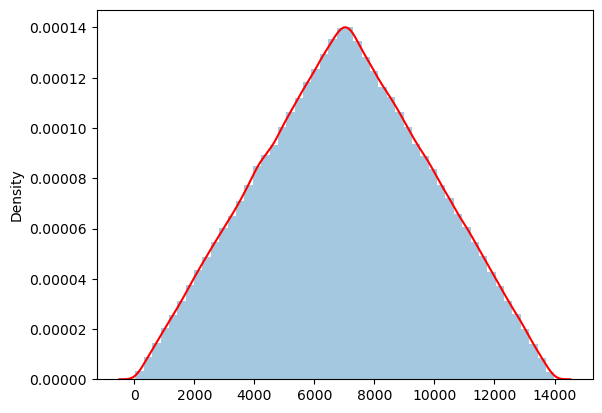

In [23]:
sns.distplot(x=df["Item_Outlet_Sales"],kde_kws={'color': 'red'})
plt.show()

##### 👉 The target variable "Item_Outlet_Sales" is assumed to follow a normal distribution

#### Numerical variables distributions

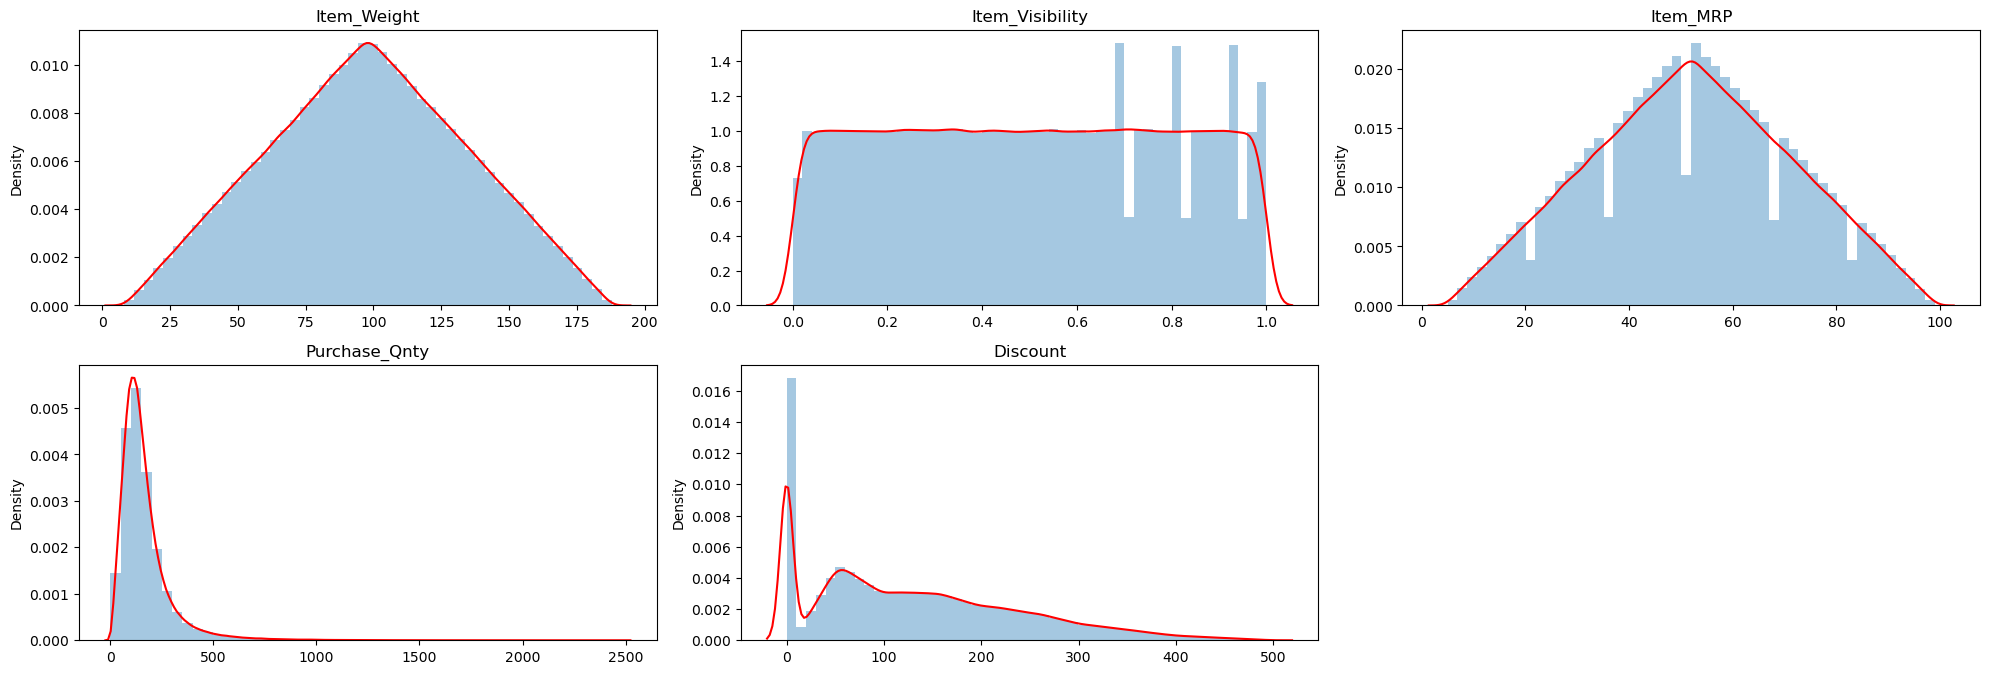

In [24]:
columns_to_plot = ['Item_Weight','Item_Visibility','Item_MRP','Purchase_Qnty','Discount']
plt.figure(figsize=(20,20))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df_num[col_name],kde_kws={'color': 'red'})
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [25]:
df_num.skew()

Item_Weight          0.000353
Item_Visibility      0.001053
Item_MRP            -0.000502
Item_Outlet_Sales   -0.000704
Purchase_Qnty        3.403361
Discount             0.699919
dtype: float64

##### 👉 Item_Weight: The skewness is positive (0.000353), indicating a right-skewed distribution. This means that the tail on the right side is longer or fatter than the left side.

##### 👉 Item_Visibility: The skewness is positive (0.001053), suggesting a right-skewed distribution.

##### 👉 Item_MRP: The skewness is negative (-0.000502), implying a left-skewed distribution. The left tail is longer or fatter than the right side.

##### 👉 Item_Outlet_Sales: The skewness is negative (-0.000704), indicating a left-skewed distribution.

##### 👉 Purchase_Qnty: The skewness is significantly positive (3.403361), suggesting a right-skewed distribution with a long right tail.

##### 👉 Discount: The skewness is positive (0.699919), indicating a right-skewed distribution.

#### Categorical variables visual's using countplot and pie

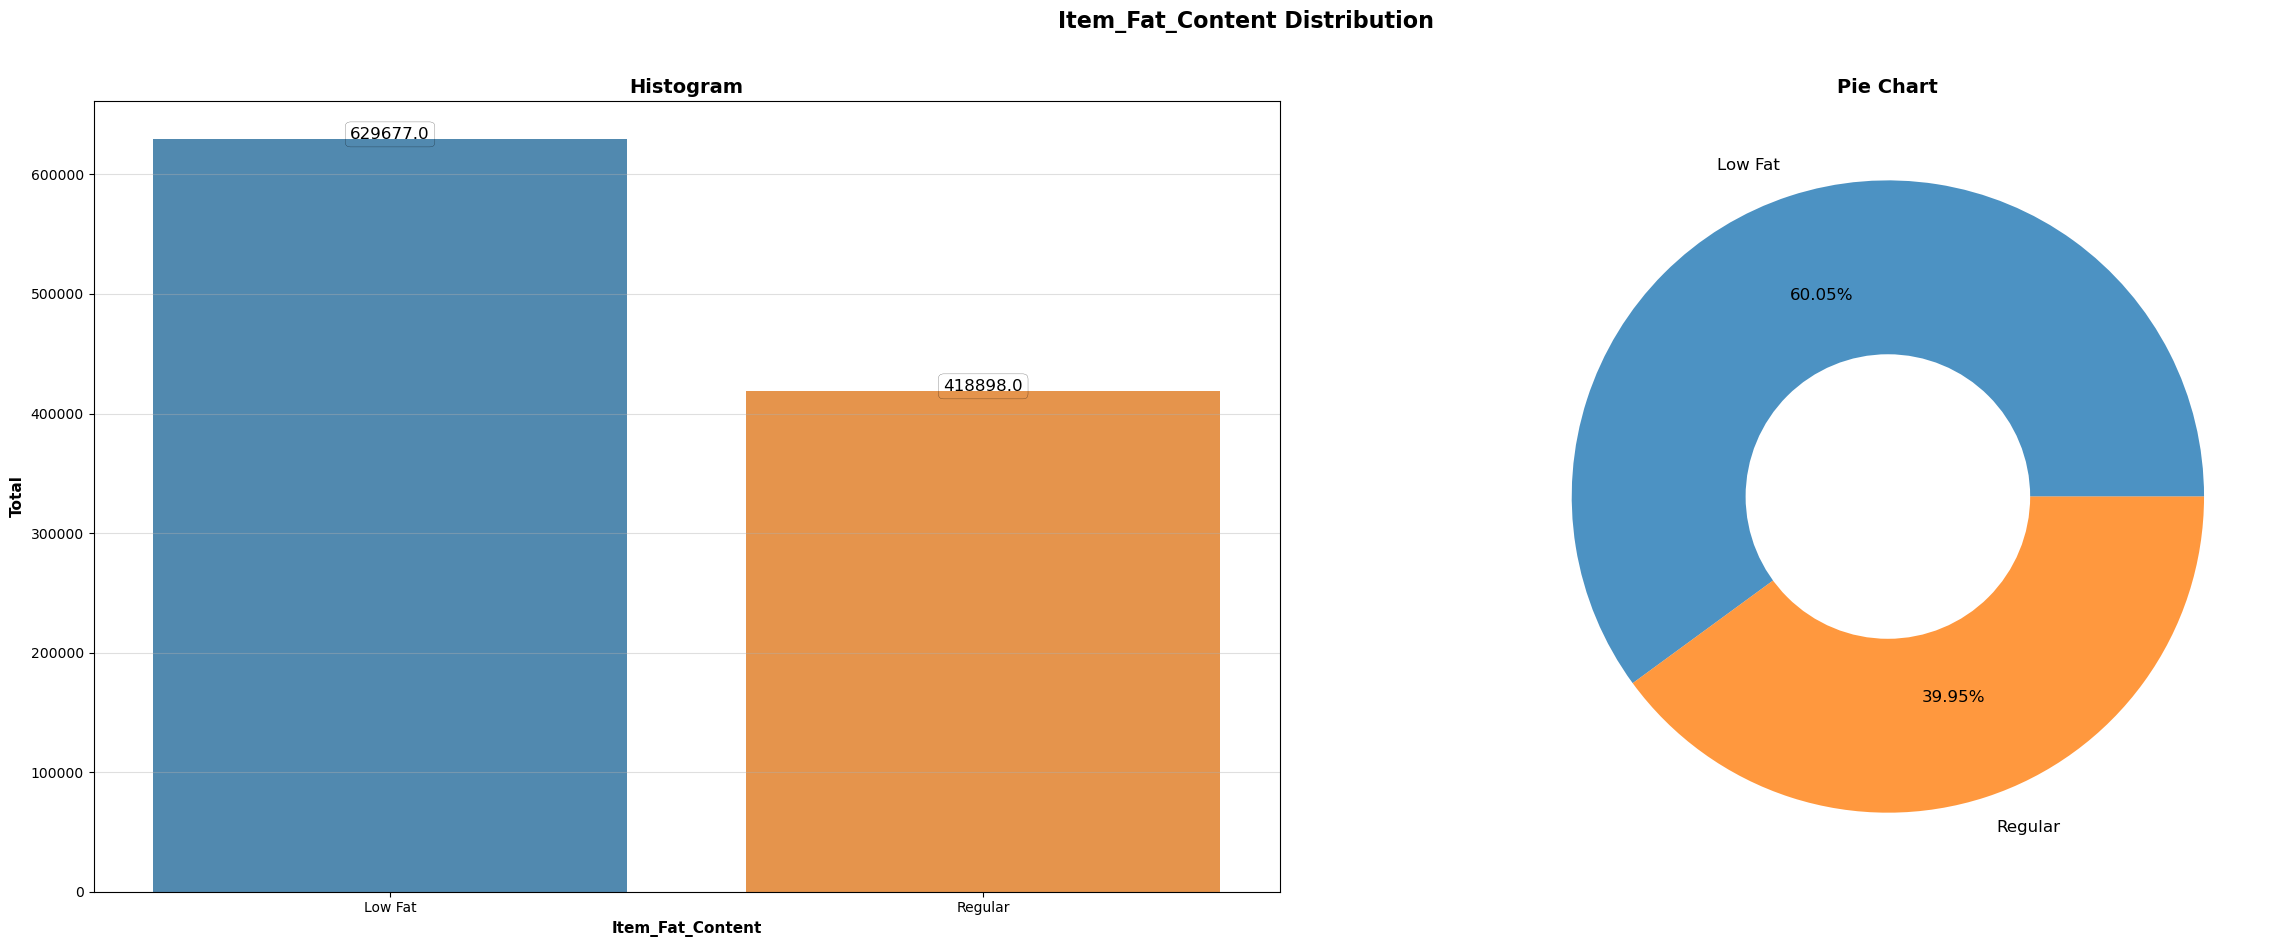

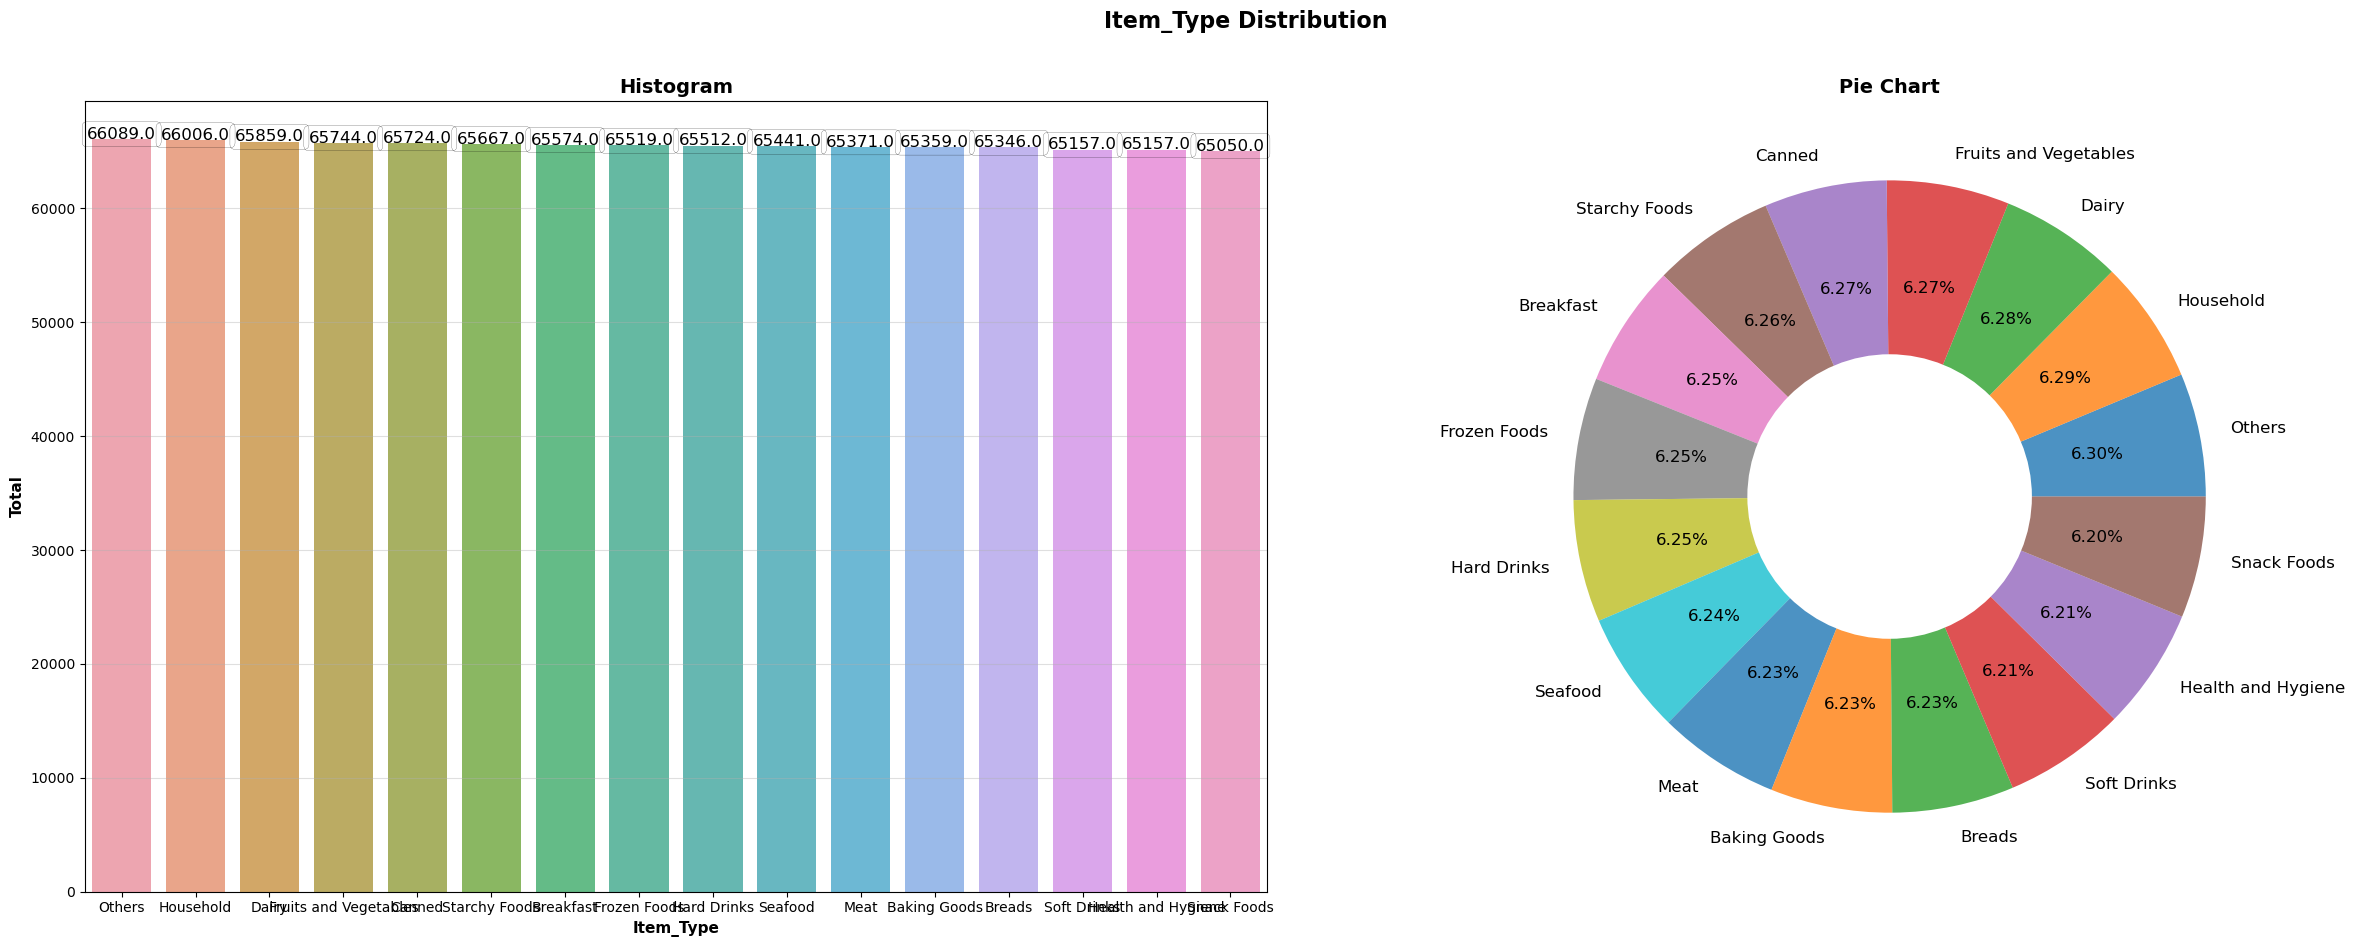

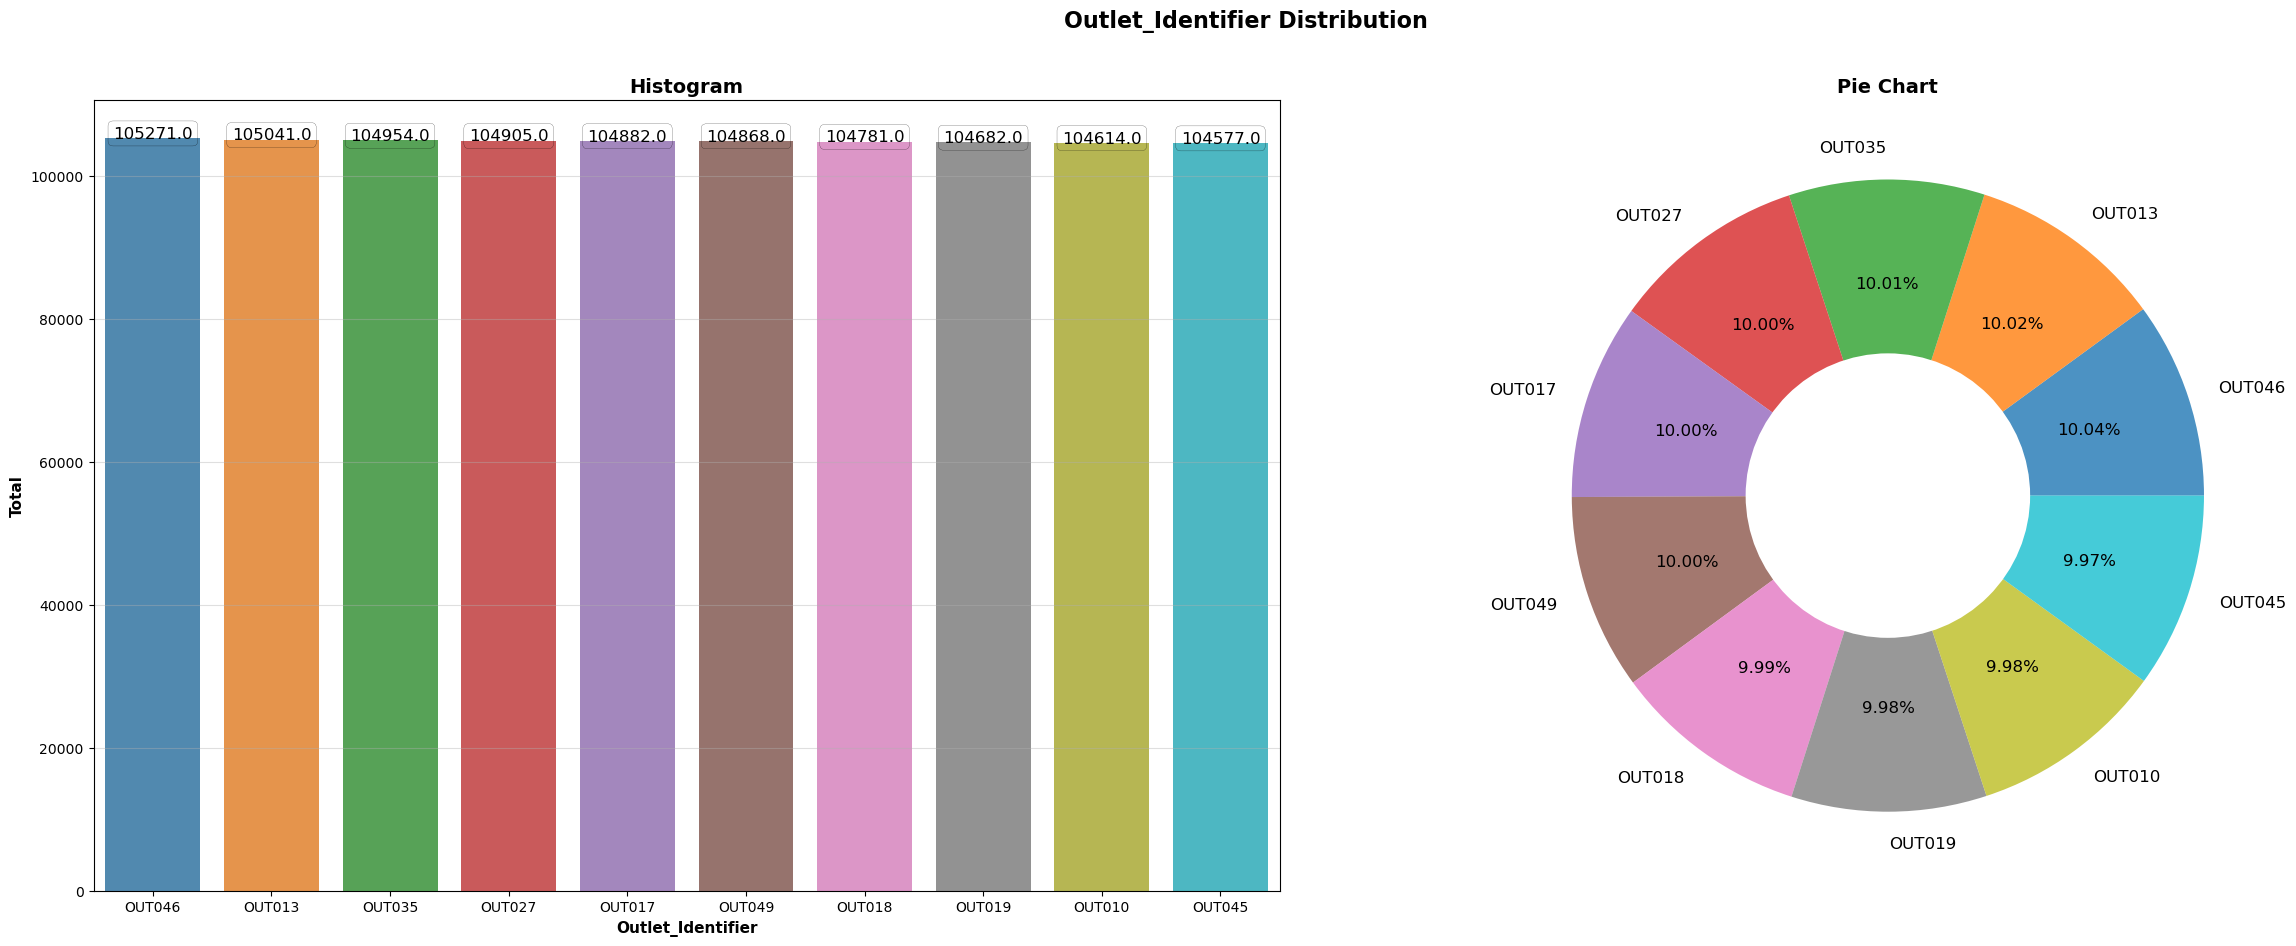

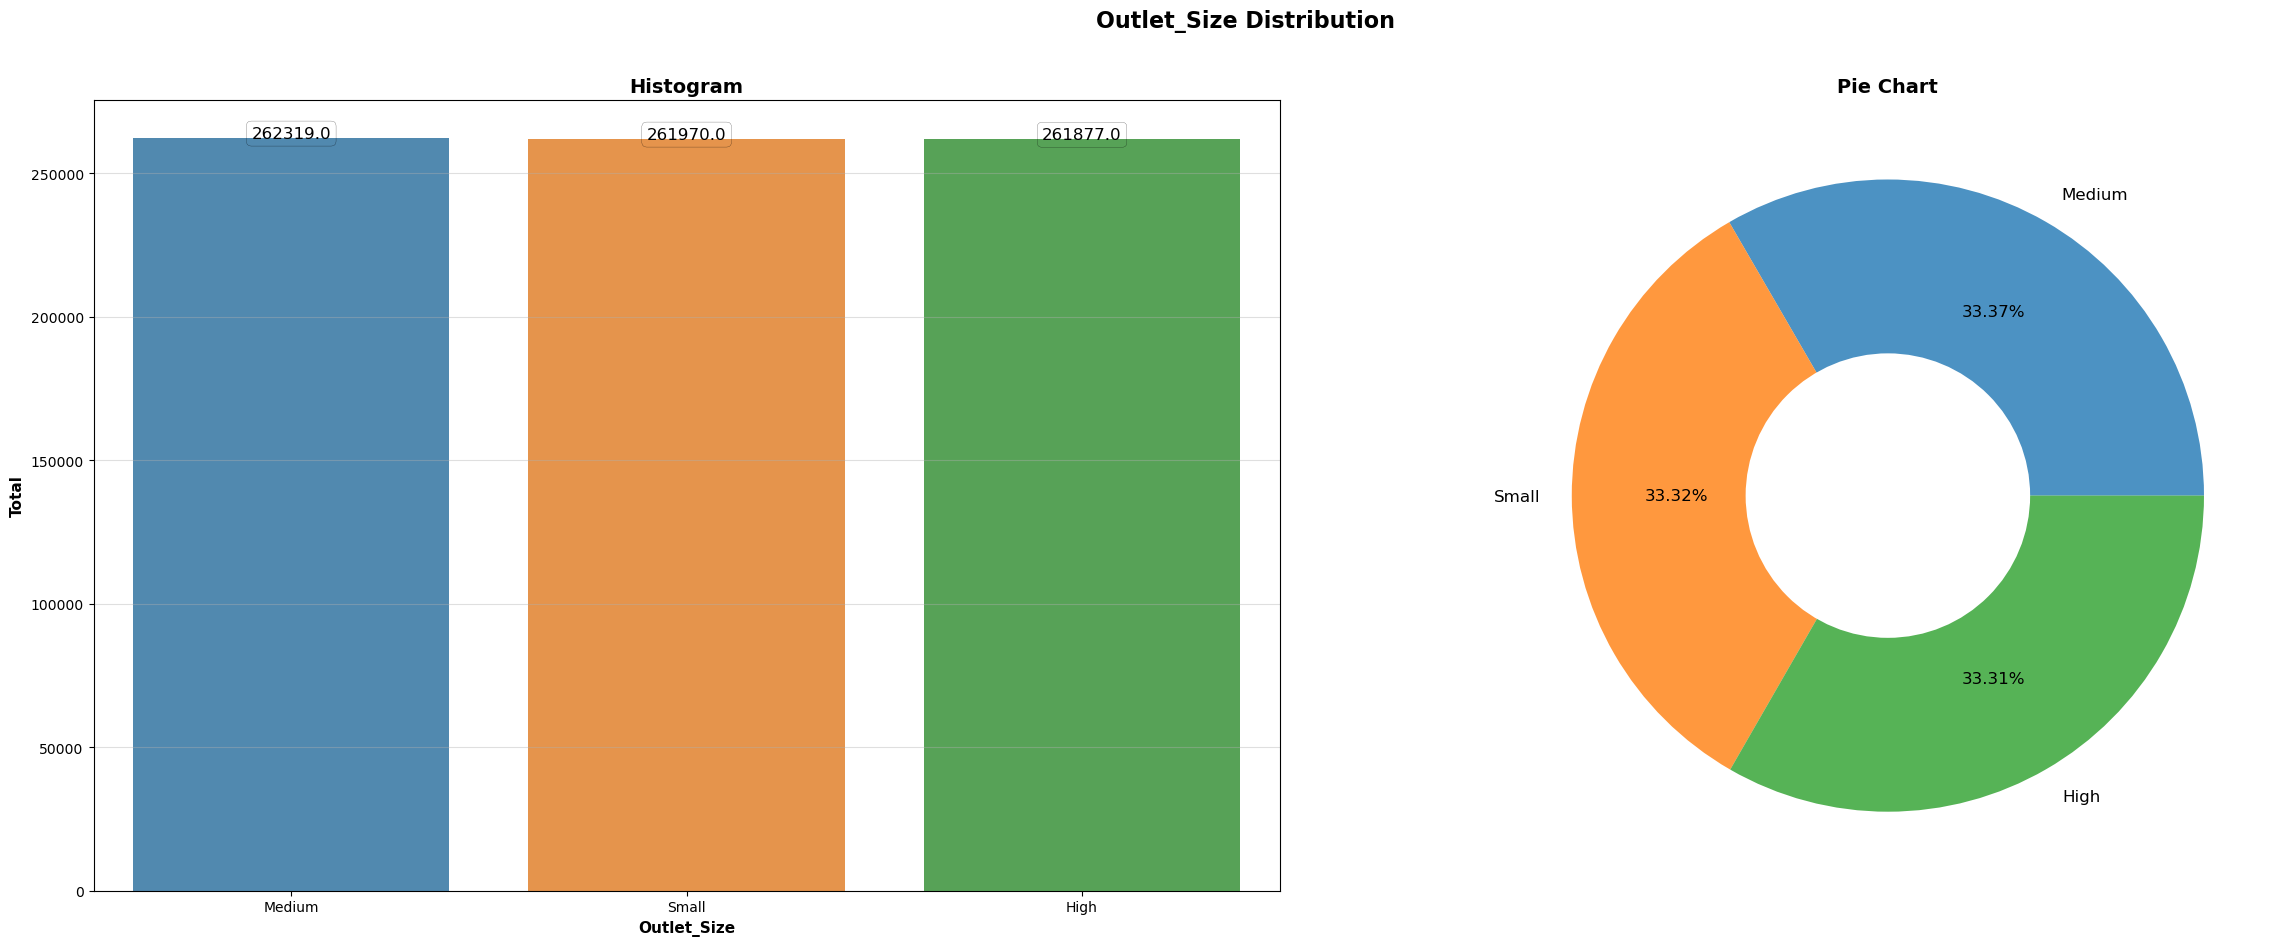

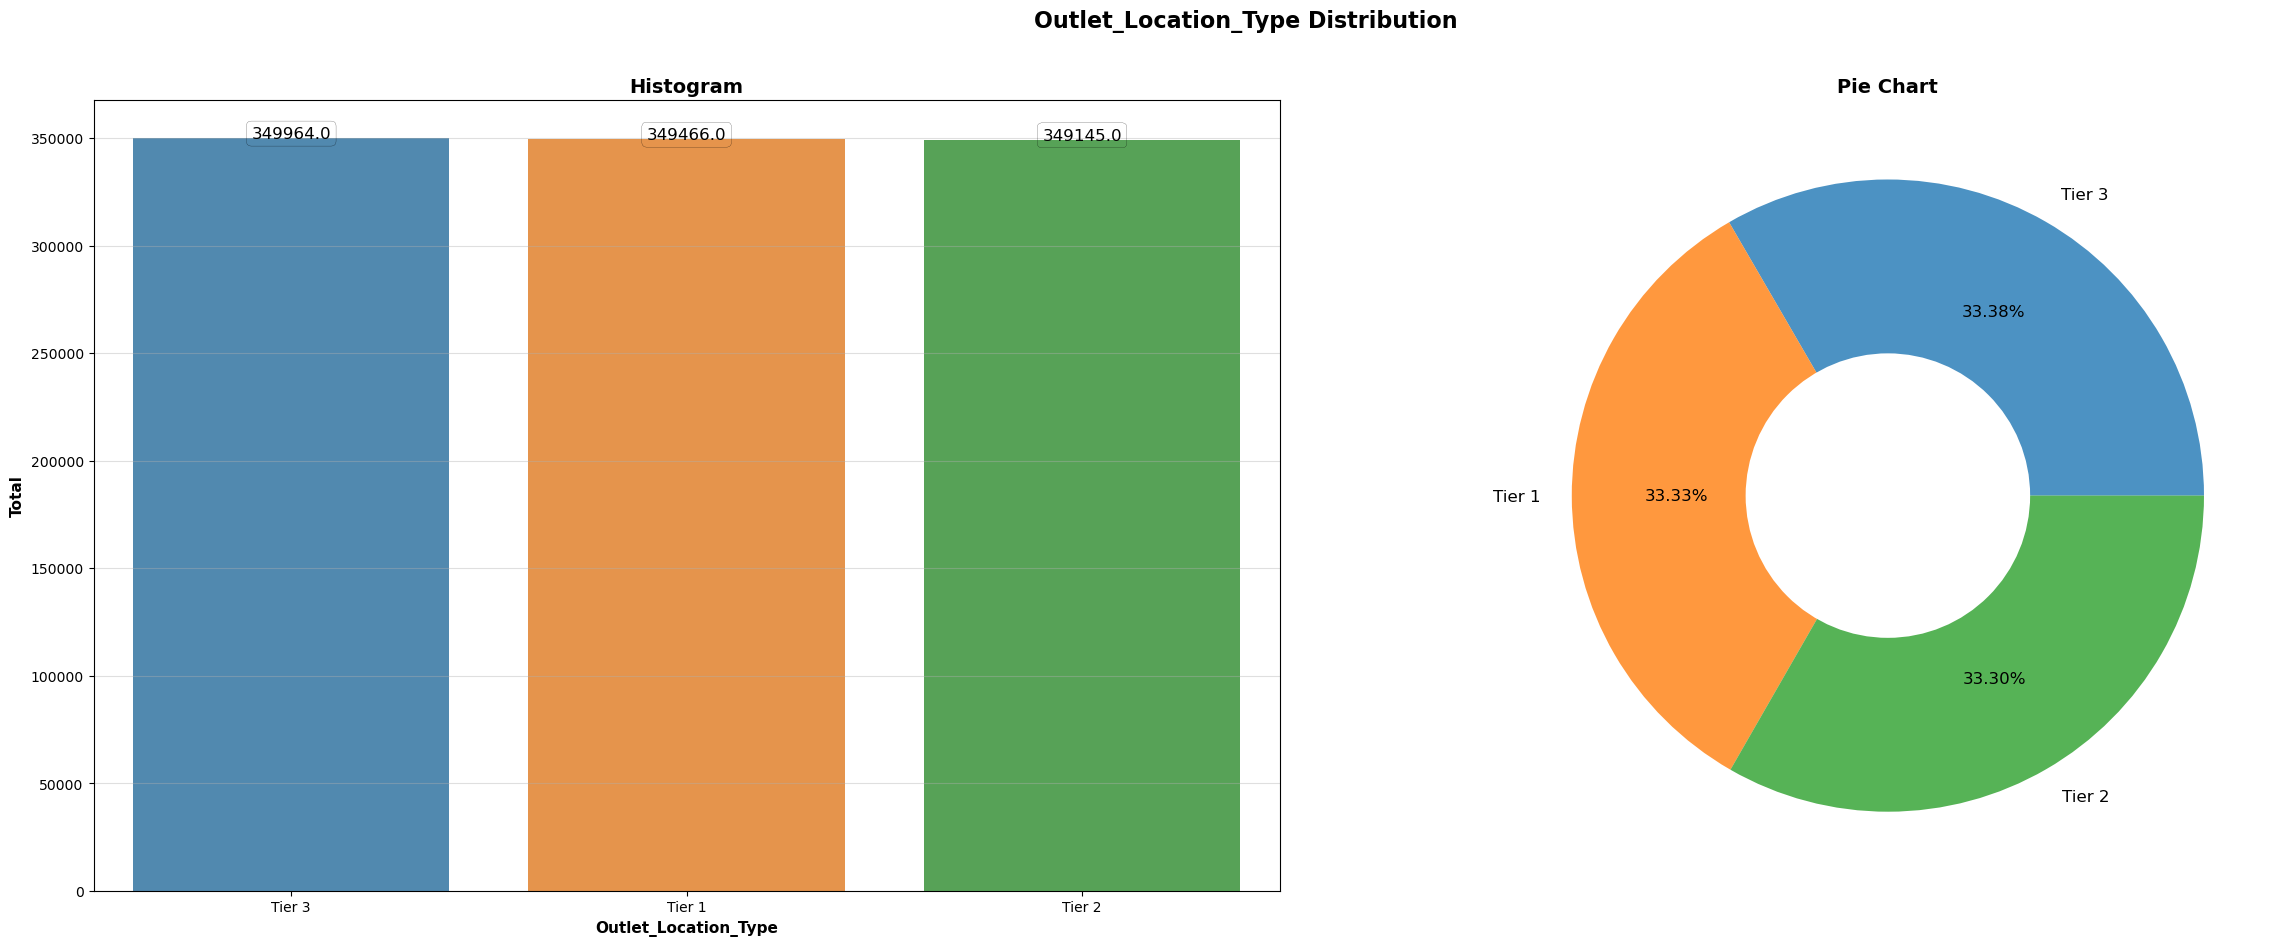

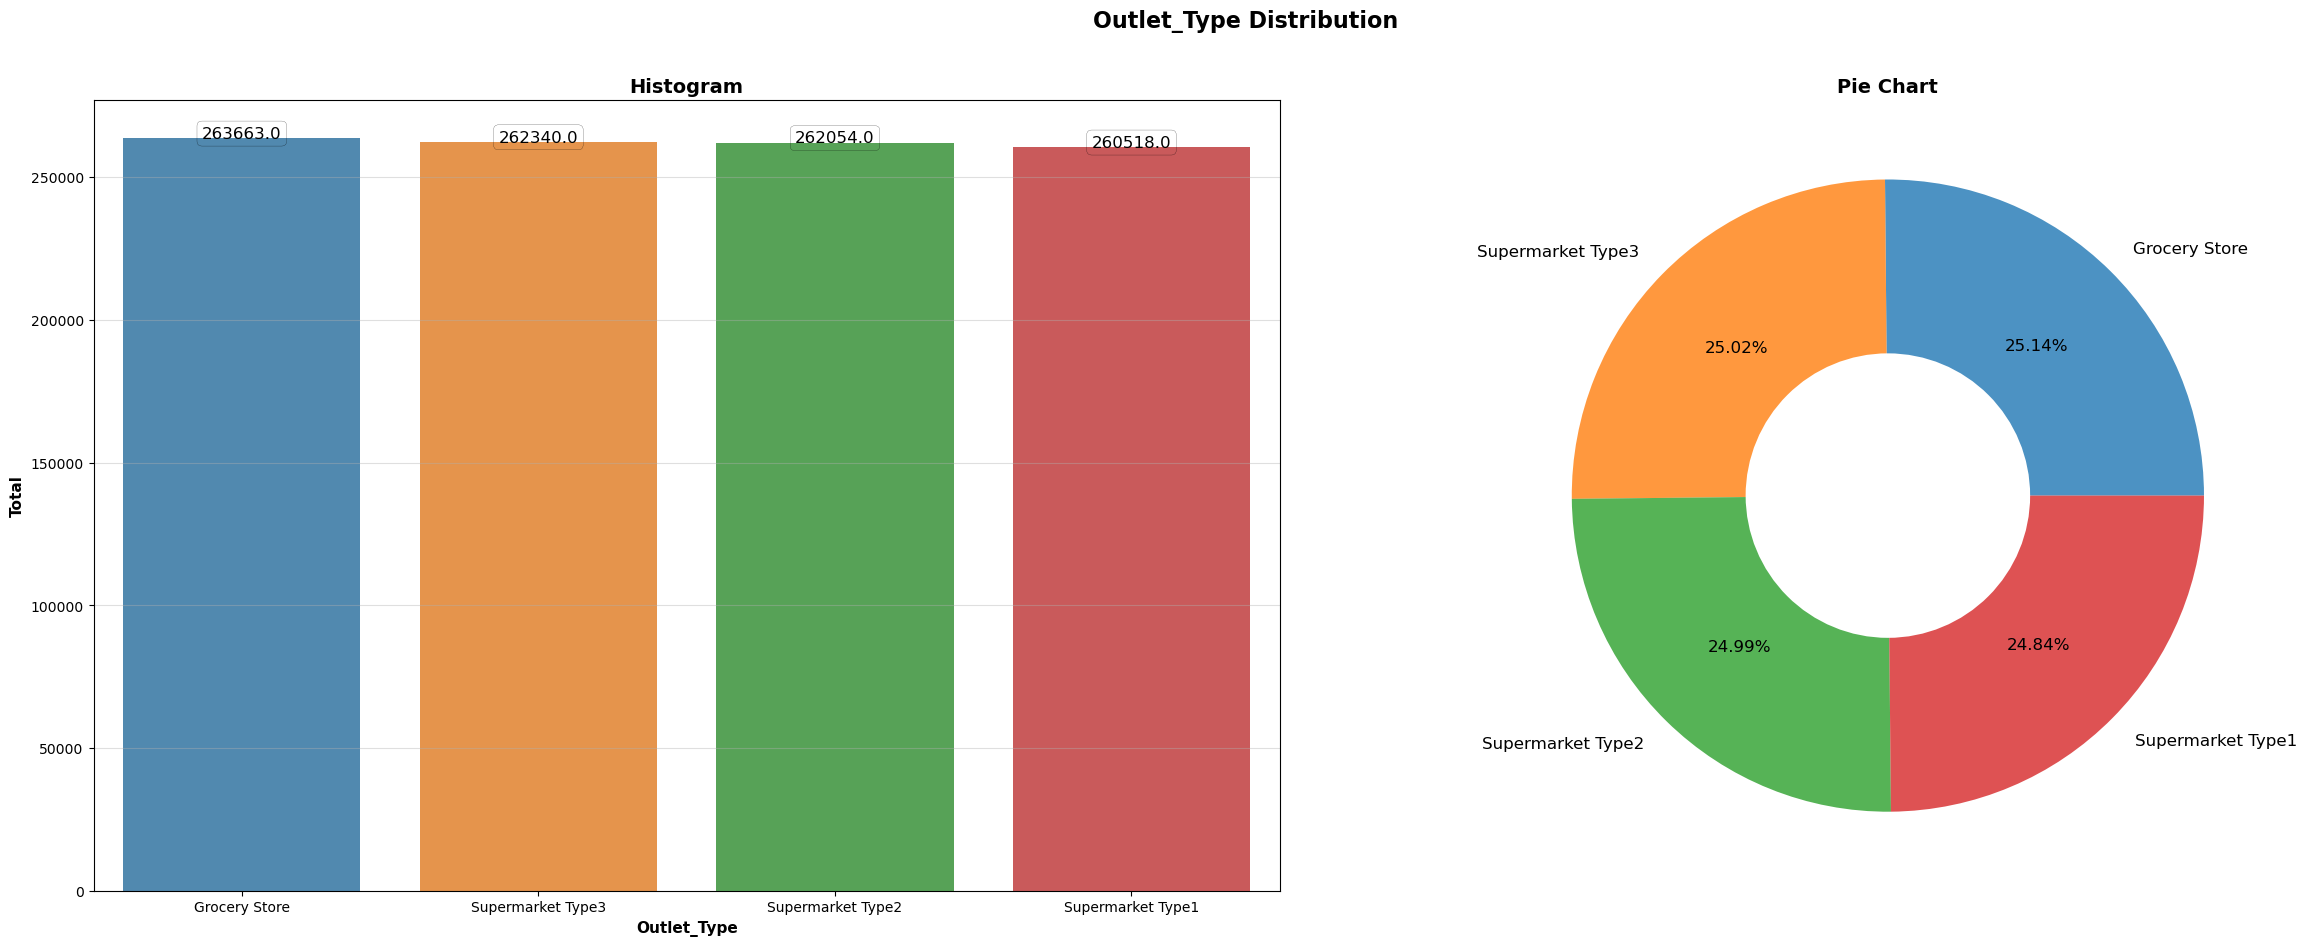

In [26]:
columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in columns:
    labels = df[column].dropna().unique()
    order = df[column].value_counts().index
    plt.figure(figsize=(25, 10))
    plt.suptitle(f'{column} Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

   

    # Histogram
    countplt = plt.subplot(1, 2, 1)
    plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    ax = sns.countplot(x=column, data=df, order=order, alpha=0.85)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center',
                fontsize=12, bbox=dict(facecolor='none', linewidth=0.15, boxstyle='round'))
    plt.tight_layout(rect=[0, 0.04, 1, 0.965])
    plt.xlabel(column, fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.grid(axis='y', alpha=0.4)

    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    plt.pie(df[column].value_counts(), labels=order, pctdistance=0.67, autopct='%.2f%%',
            wedgeprops=dict(alpha=0.8), textprops={'fontsize': 12})
    centre = plt.Circle((0, 0), 0.45, fc='white')
    plt.gcf().gca().add_artist(centre)
    plt.show()

##### 👉 "The 'Item_Fat_Content' : field has two categories: 'Low Fat' and 'Regular.' 'Low Fat' comprises a higher percentage, accounting for 60%, in contrast to 'Regular,' which has a lower percentage of 40%."

##### 👉 "The 'Item_Type' :field exhibits a unique distribution, with an average of 6.25% across all categories present in the dataset."

##### 👉 Outlet_Identifier:There are ten outlets, with almost all the outlets have the same number of outlets (around 10%). and However, OUT27,"OUT18" and "OUT19" have the least number of outlets (around 9%).

##### 👉 Outlet_Size: There are 3 types of outlet size, small, medium, and high size. Medium size becomes the outlet size with the most number .However, the smallest number outlet size is High size .

##### 👉"The 'Outlet_Location_Type' has three tiers—Tier 1, Tier 2, and Tier 3—with an equal percentage distribution of approximately 33.30% for each."

##### 👉 "The 'Outlet_Type' has four types—Type 1, Type 2, Type 3, and Grocery store—each with an equal percentage of 25%."

# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.4 Bivariate and Multivariate Analysis<a id="bivariate_multivariate_analysis"></a></mark>** 

### Heatmap for  Numerical variables 

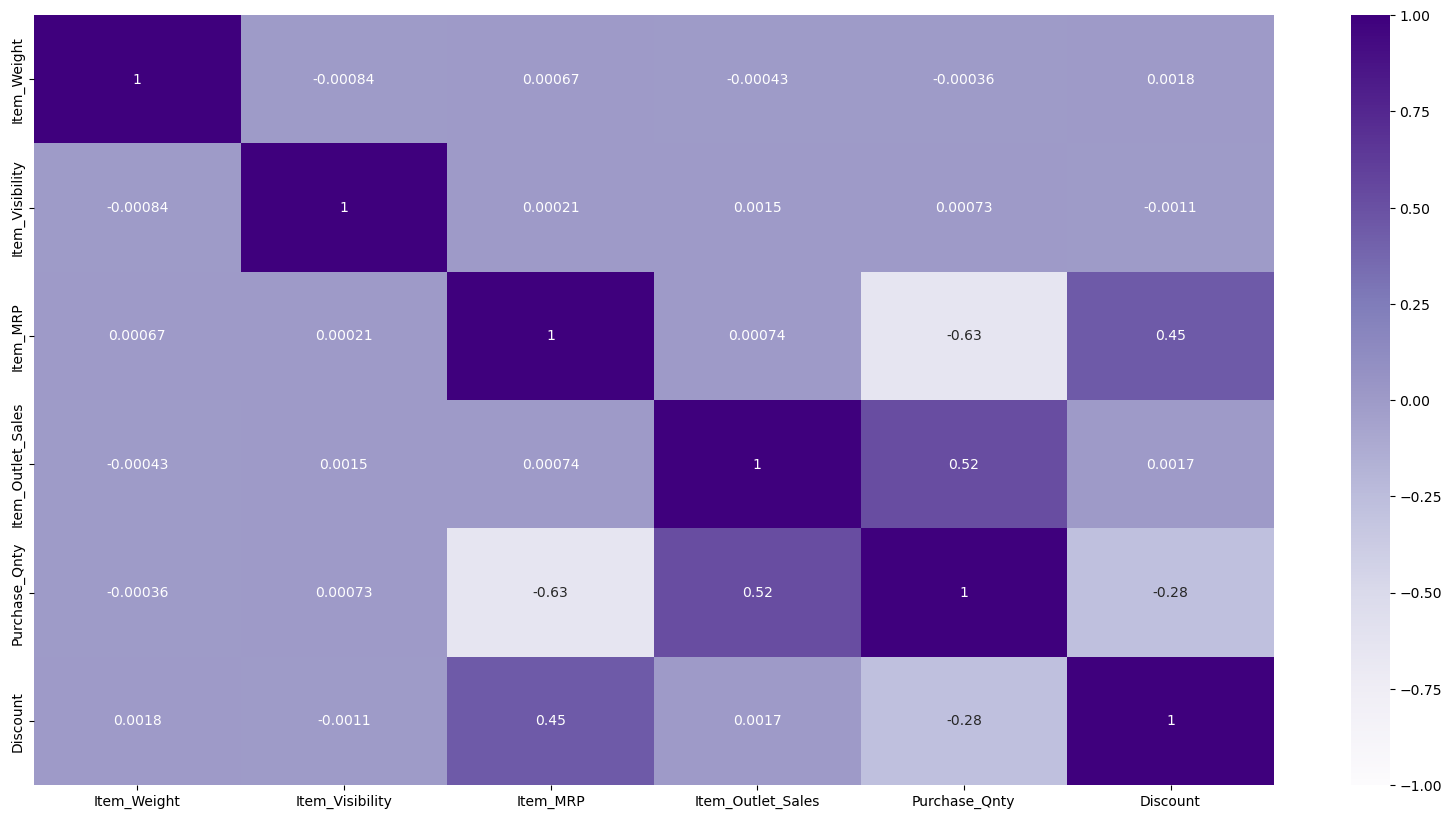

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

##### 👉 The main purpose of a heat map is to assess multicollinearity.

##### 👉  Item_Weight and other variables:

- 1.Very low correlations (close to 0), indicating weak linear relationships.

##### 👉  Item_Visibility and other variables:

- 1.Very low correlations with Item_Weight, Item_MRP, and Item_Outlet_Sales.
- 2.A very small positive correlation with Purchase_Qnty.
- 3.A small negative correlation with Discount.

##### 👉 Item_MRP and other variables:

- 1.Very low correlations with Item_Weight and Item_Visibility.
- 2.A very small positive correlation with Item_Outlet_Sales.
- 3.A moderate negative correlation with Purchase_Qnty.
- 4.A moderate positive correlation with Discount.

##### 👉 Item_Outlet_Sales and other variables:

- 1.Very low correlations with Item_Weight and Item_Visibility.
- 2.A very small positive correlation with Item_MRP.
- 3.A moderate positive correlation with Purchase_Qnty.
- 4.A very small positive correlation with Discount.

##### 👉 Purchase_Qnty and other variables:

- 1.Very low correlations with Item_Weight and Item_Visibility.
- 2.A moderate negative correlation with Item_MRP.
- 3.A moderate positive correlation with Item_Outlet_Sales.
- 4.A moderate negative correlation with Discount.

##### 👉 Discount and other variables:

- 1.Very low correlations with Item_Weight and Item_Visibility.
- 2.A moderate positive correlation with Item_MRP.
- 3.A very small positive correlation with Item_Outlet_Sales.
- 4.A moderate negative correlation with Purchase_Qnty.

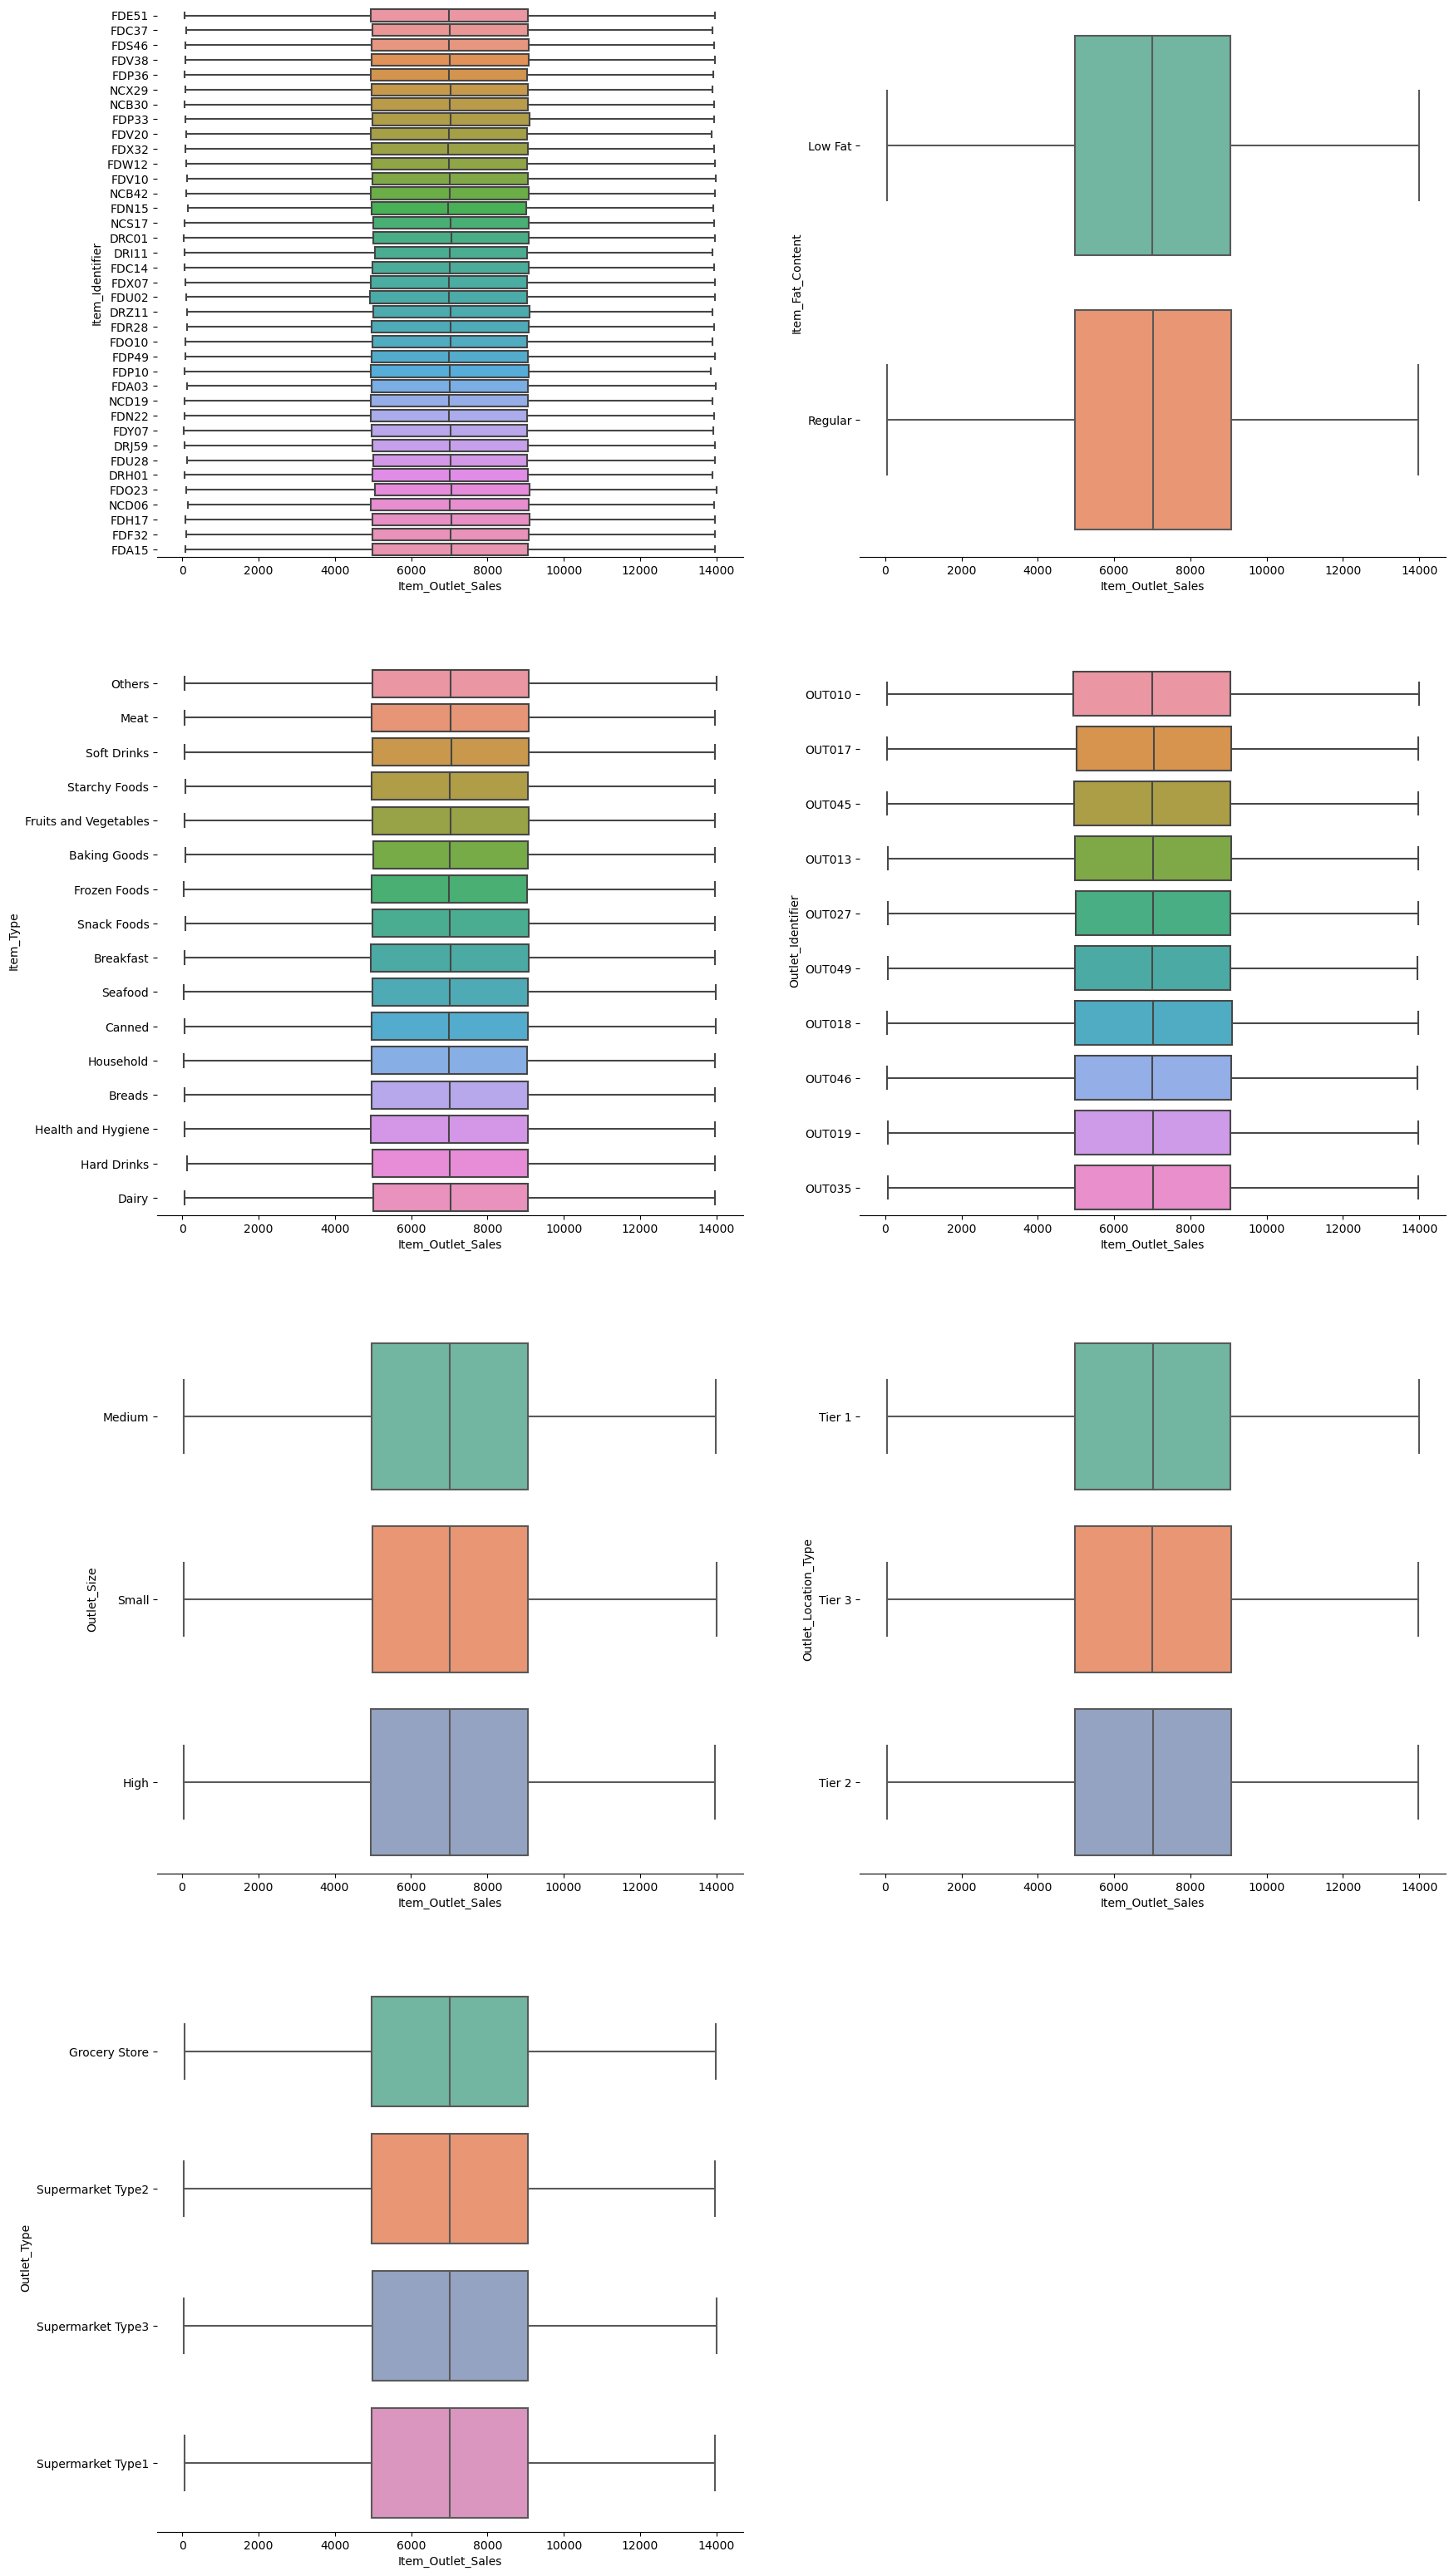

In [28]:
numeric_columns = df_cat.columns
plt.figure(figsize=(20, 60))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(6,2,i+1)
        
        sns.boxplot(x='Item_Outlet_Sales',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 

##### 👉  By performing this analysis, we can identify outliers within the category variable. From the above figure, it is evident that no outliers are present in the category variable associated with Item_Outlet_Sales.

<Figure size 1000x600 with 0 Axes>

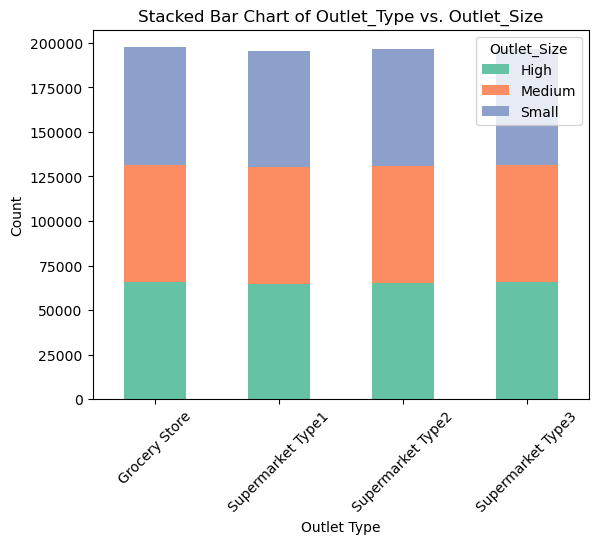

In [29]:
df_stacked = df.groupby(['Outlet_Type', 'Outlet_Size']).size().unstack()
plt.figure(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Outlet_Type vs. Outlet_Size")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 👉 A Stacked Bar Chart comparing Outlet_Type and Outlet_Size provides insights into the distribution and relationships between the values of these two variables.

In [30]:
pd.crosstab(df["Item_Fat_Content"],df["Item_Type"]).T

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,39410,25949
Breads,39173,26173
Breakfast,39288,26286
Canned,39625,26099
Dairy,39390,26469
Frozen Foods,39289,26230
Fruits and Vegetables,39407,26337
Hard Drinks,39409,26103
Health and Hygiene,39212,25945


##### 👉 In most categories, the dominant fat content is "Low Fat" compared to "Regular." This is evident by observing higher counts in the "Low Fat" column for almost every item type.

In [31]:
cross_tab = pd.crosstab(df["Item_Fat_Content"], df["Outlet_Size"])
cross_tab.T

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
High,157293,104584
Medium,157571,104748
Small,157180,104790


##### 👉  The counts for "Low Fat" and "Regular" are relatively similar across different outlet sizes, suggesting that the distribution of fat content is comparable regardless of the outlet size.

<Figure size 2000x6000 with 0 Axes>

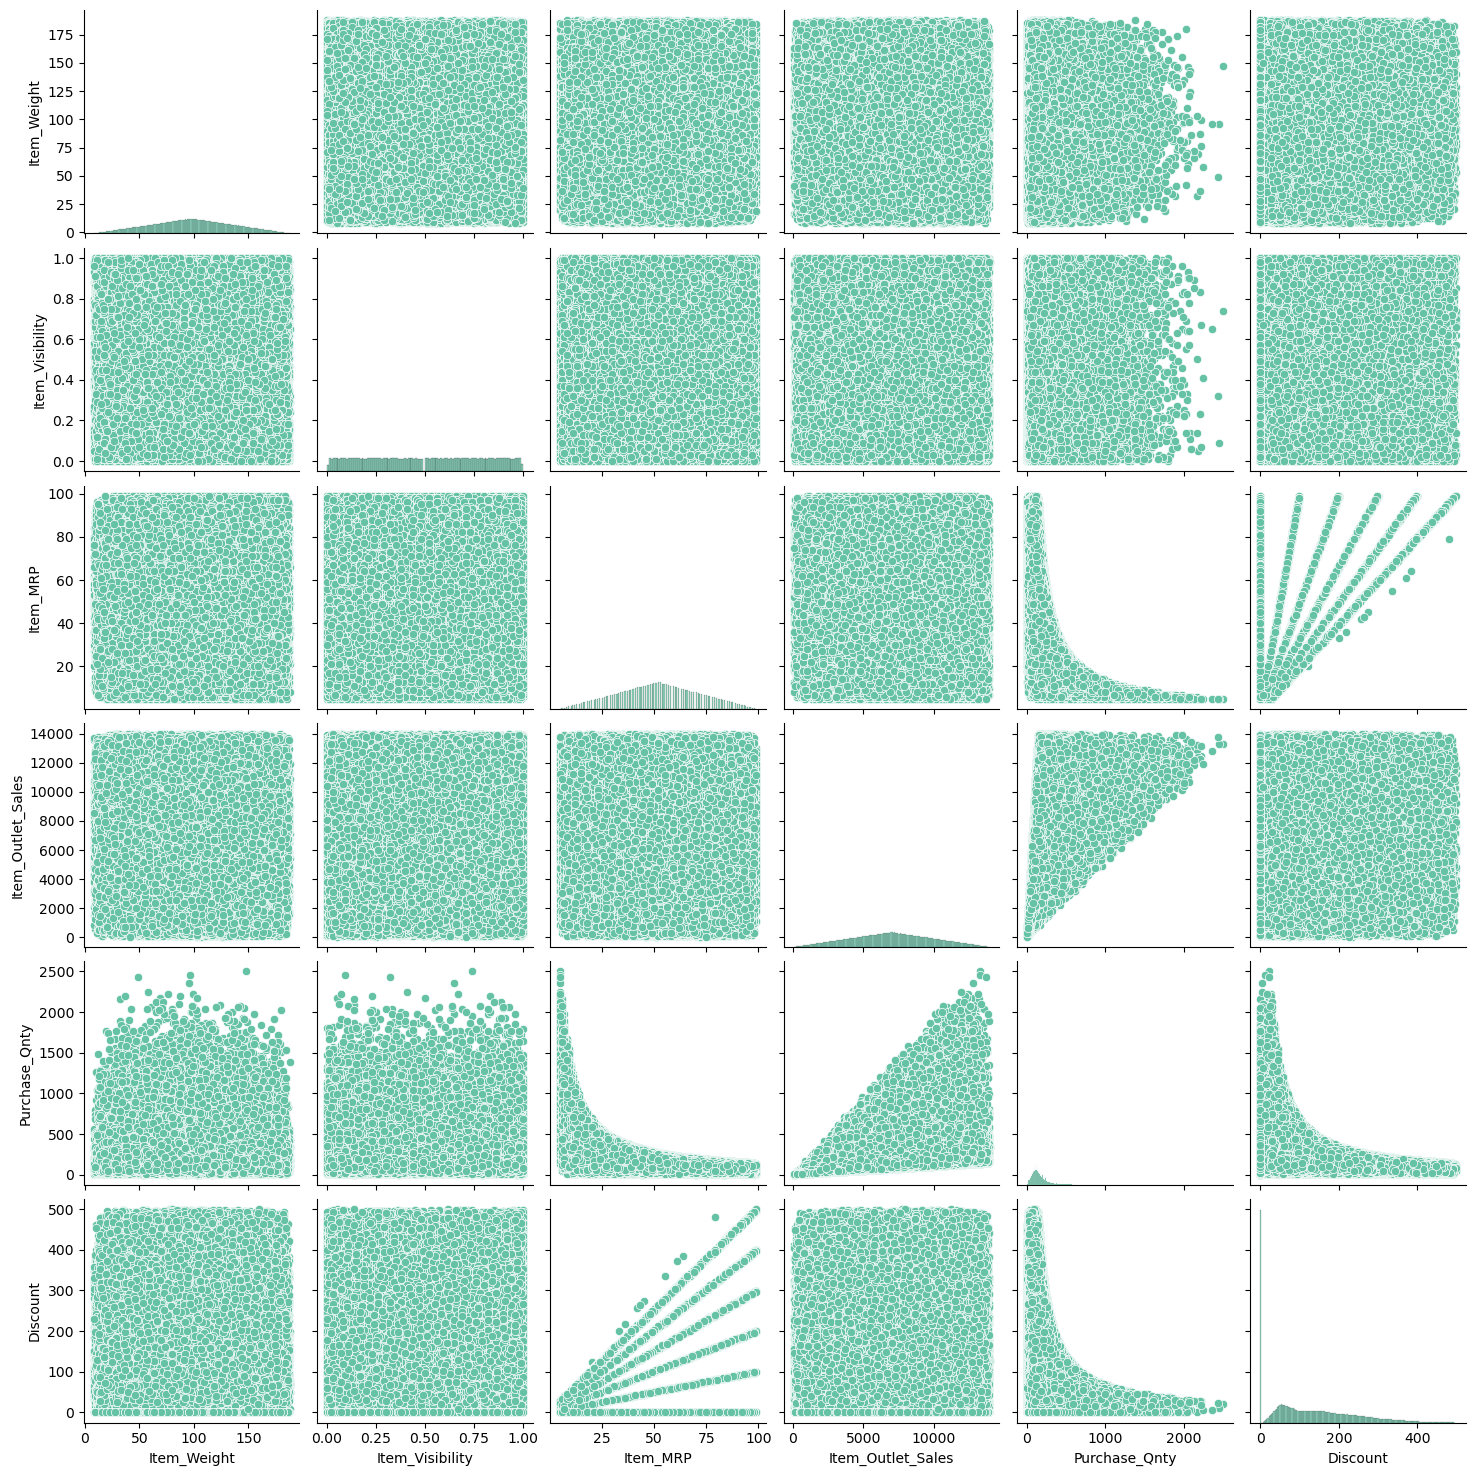

In [32]:
plt.figure(figsize=(20, 60))
sns.pairplot(df)
plt.show()

#####  Multivariate statistics compare more than two variables.
##### we can see the all the plots from the above plots

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.5 Missing Value Treatment<a id="missing_value_treatment"></a></mark>** 

In [33]:
import missingno as ms

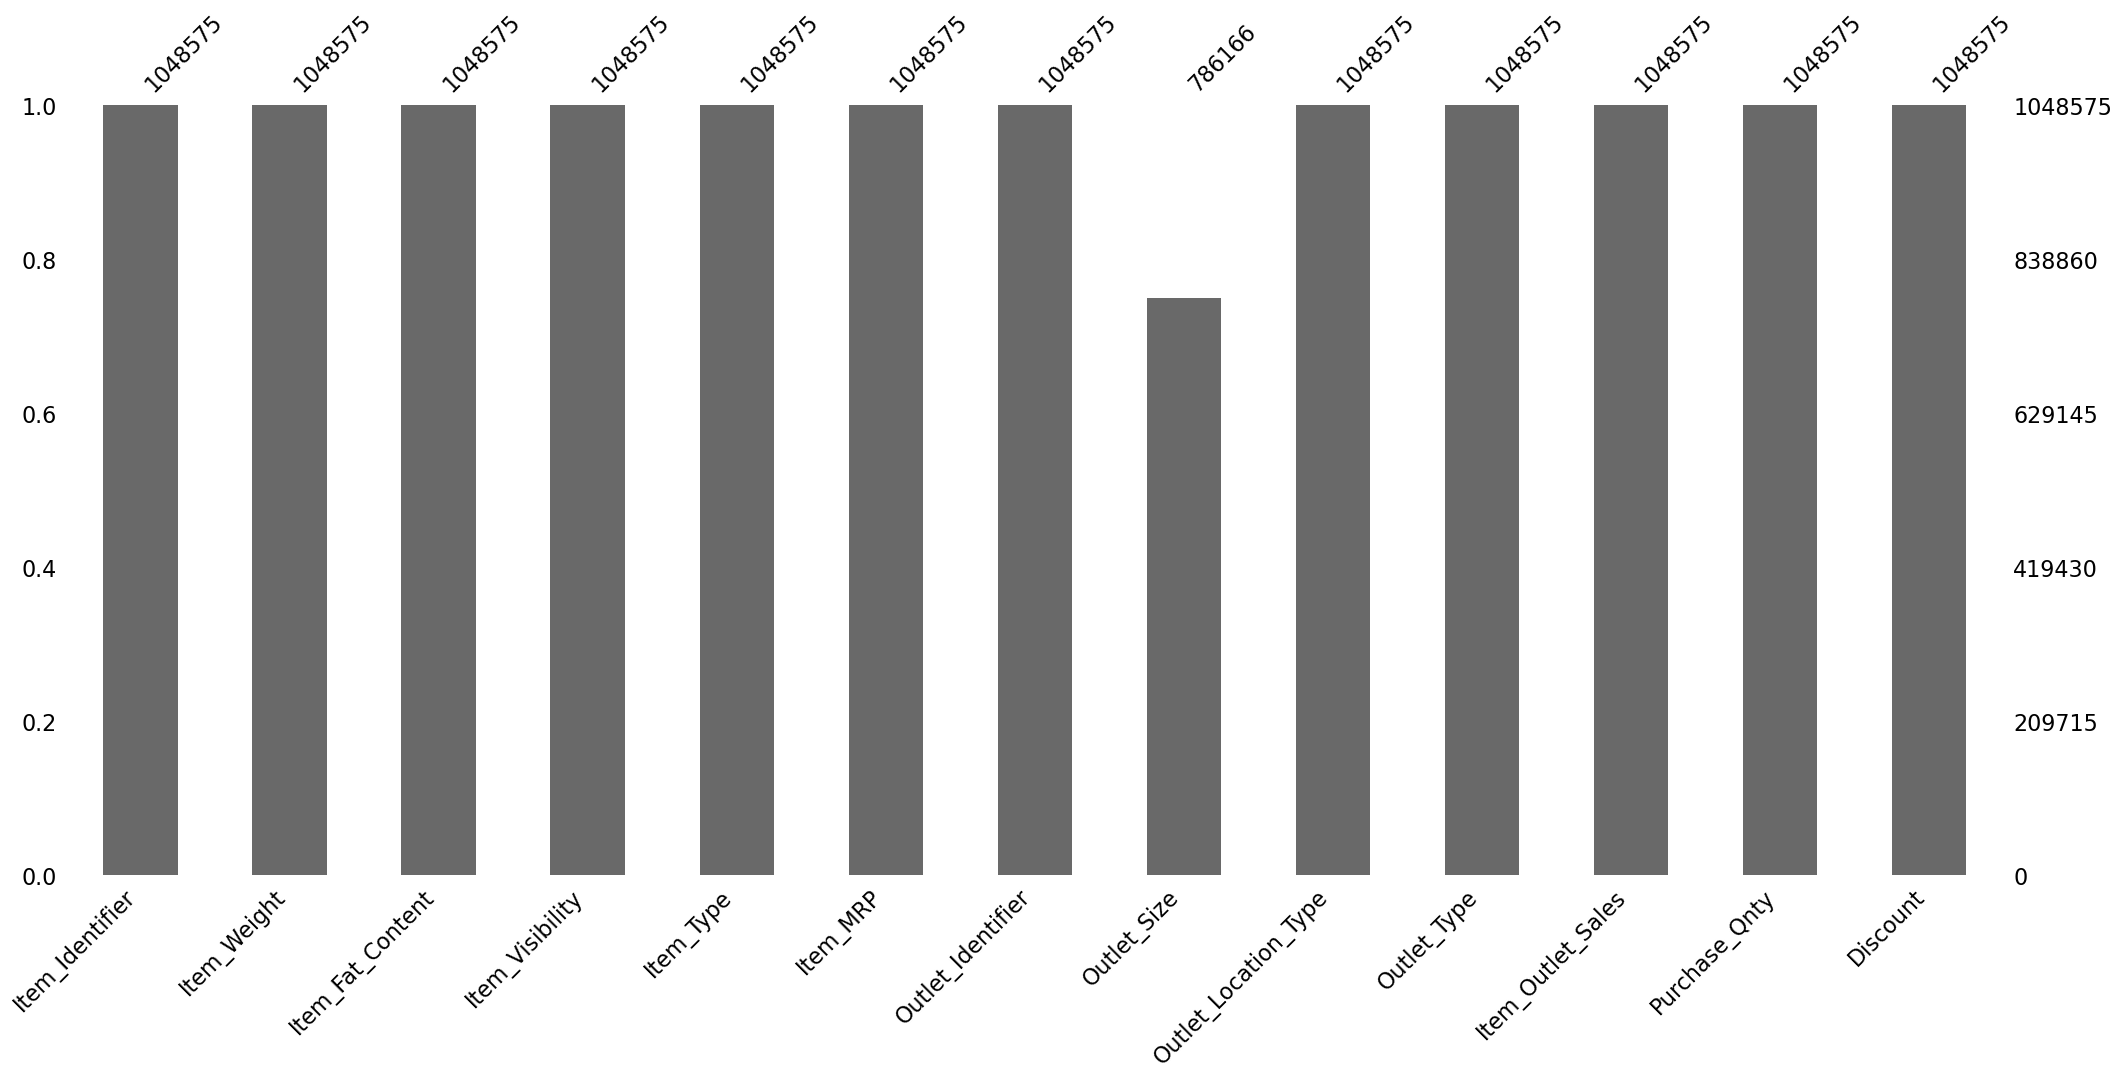

In [34]:
ms.bar(df)
plt.show()

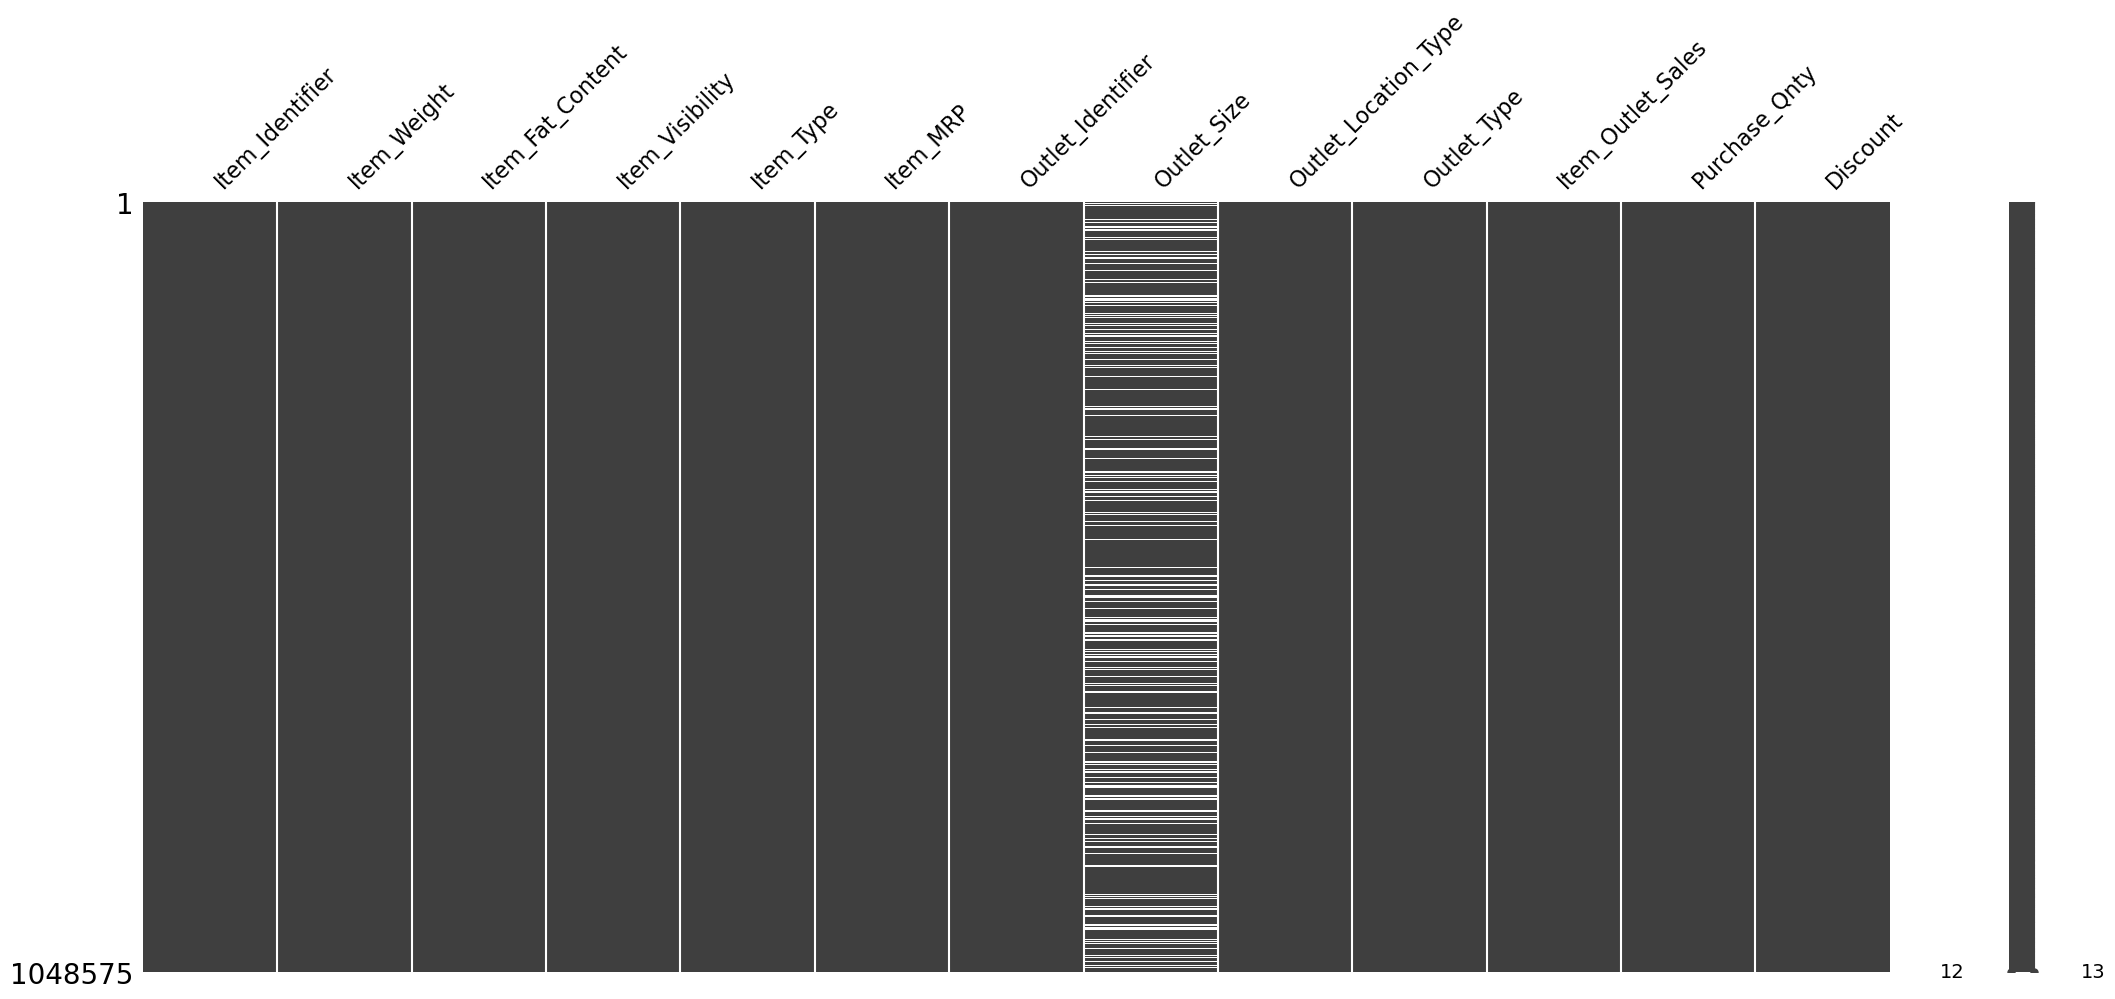

In [35]:
ms.matrix(df)  
plt.show()

In [36]:
def missing_value_percentage(df):
    missvalcount = df.isnull().sum()
    missvalpercent = round(df.isnull().sum() / df.shape[0] * 100)
    dtypes = df.dtypes
    newdf = pd.concat([missvalcount, missvalpercent, dtypes], axis=1)
    newdf.columns = ['missvalcount', 'missval%', 'dtype']
    newdf = newdf[newdf['missvalcount'] != 0].sort_values(by='missvalcount', ascending=False)
    return newdf

In [37]:
missing_value_percentage(df)

,missvalcount,missval%,dtype
Outlet_Size,262409,25.0,object


In [38]:
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [39]:
df['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Medium
1            Small
2             High
3             High
4           Medium
            ...   
1048570     Medium
1048571    Unknown
1048572       High
1048573     Medium
1048574     Medium
Name: Outlet_Size, Length: 1048575, dtype: object>

##### 👉 I am not combining it with another category because creating a combined category may introduce bias towards one specific category. Therefore, I have opted to create an "unknown" category type instead.

In [40]:
missing_value_percentage(df)

,missvalcount,missval%,dtype


# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.6 Outliers Analysis<a id="outliers_analysis"></a></mark>** 

In [41]:
Q1 = df_num.quantile(0.25) 
Q3 = df_num.quantile(0.75) 
IQR = Q3 - Q1 

outlier = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    num_outliers = len(outlier[outlier[i] == True][i])
    if num_outliers > 0:
        print(f'Total number of outliers in column {i} are {num_outliers}')

Total number of outliers in column Purchase_Qnty are 64483
Total number of outliers in column Discount are 6461


## 4.6.2 Visualizing outliers using Boxplots & distplot   

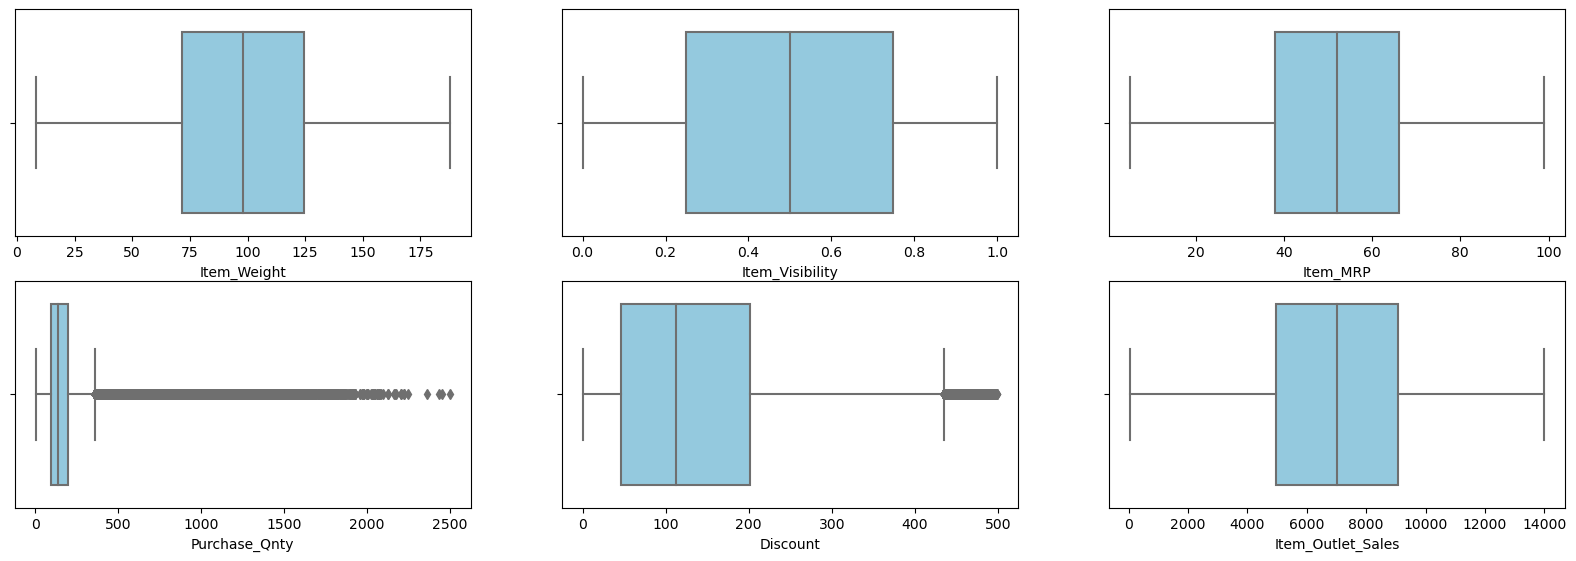

In [42]:
columns_to_plot = ['Item_Weight','Item_Visibility','Item_MRP','Purchase_Qnty','Discount','Item_Outlet_Sales']
plt.figure(figsize=(20,10))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col_name],color='skyblue')
plt.show()

##### 👉 After conducting an outliers analysis, we observed outliers in both the Purchase Quantity and Discount.

## 4.6.3 Removal of Outliers

##### 👉 I used the percentile method to remove outliers.

In [43]:
def outlier(x, column_name):
    max_value = df[column_name].quantile(0.95)
    min_value = df[column_name].quantile(0.05)
    df[column_name] = np.clip(df[column_name], min_value, max_value)
    return df

In [44]:
df2 = outlier(df,  "Purchase_Qnty")  
df3 = outlier(df2, "Discount") 

## 4.6.4 After removing outlier ,Visualizing using Boxplots & distplot

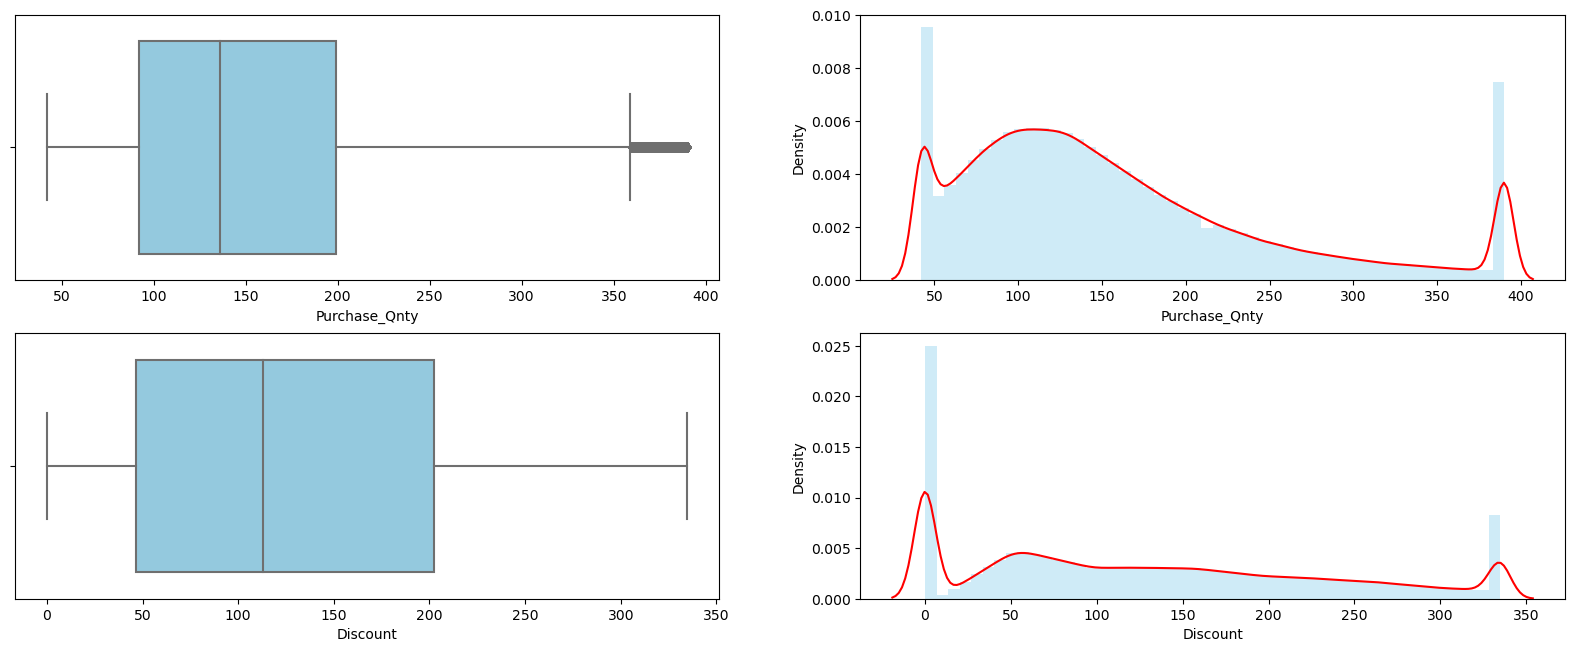

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.boxplot(x=df3["Purchase_Qnty"],color='skyblue')
plt.subplot(5,2,2)
sns.distplot(df3["Purchase_Qnty"],color='skyblue',kde_kws={'color': 'red'})
plt.subplot(5,2,3)
sns.boxplot(x=df3["Discount"],color='skyblue')
plt.subplot(5,2,4)
sns.distplot(df3["Discount"],color='skyblue',kde_kws={'color': 'red'})
plt.show()

## **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.7 Data Scaling , Feature Transformations and Encoding <a id="data_scaling_transformation"></a></mark>** 

#### Create a broad category of Item_Type

In [46]:
df3["Item_Type_Combined"]=df3["Item_Identifier"].apply(lambda x:x[0:2])

In [47]:
df3["Item_Type_Combined"]=df3["Item_Type_Combined"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})

In [48]:
df3["Item_Type_Combined"].value_counts()

Item_Type_Combined
Food              736851
Non-Consumable    169361
Drinks            142363
Name: count, dtype: int64

#### There are some non consumable that should not be included in Low Fat content so replace them in Non-Edible

In [49]:
df3["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    629677
Regular    418898
Name: count, dtype: int64

In [50]:
df3.loc[df["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [51]:
df3["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       528152
Regular       351062
Non-Edible    169361
Name: count, dtype: int64

In [52]:
df3.drop(["Item_Identifier"],axis=1,inplace=True)

##### 👉 To improve the quality of the analysis and prevent multicollinearity, we should drop the variable "Item_Identifier" as it is unnecessary for our current analysis.

In [53]:
df = df3.copy()

## 4.8 Encoding 

In [54]:
categorical_columns = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
for column in categorical_columns:
    df[column] = ordinalEncoder.fit_transform(df[[column]])

In [55]:
categorical = ['Item_Type','Item_Fat_Content','Outlet_Identifier','Item_Type_Combined']
for column in categorical:
    df[column] = LabelEncoder.fit_transform(df[column])

## 4.9 Data Scaling 

In [56]:
columns_to_scale = ['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Fat_Content','Outlet_Identifier','Item_Type_Combined']
for column in columns_to_scale:
    df[column] = standard_scale.fit_transform(df[[column]])

In [57]:
scale = ['Item_Weight','Item_Visibility','Item_MRP','Purchase_Qnty','Discount']
for column in scale:
    df[column] = np.sqrt(df[column])     

In [58]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Purchase_Qnty,Discount,Item_Type_Combined
0,13.260845,-0.923481,0.100000,0.760223,3.316625,-1.567125,-0.447746,-1.224994,-1.338853,4582,19.748418,0.000000,-0.047275
1,7.275988,1.298793,0.387298,0.543160,4.358899,-0.870854,0.446682,1.223831,0.447666,2882,12.369317,7.595393,-0.047275
2,9.883825,1.298793,0.905539,1.411413,6.928203,0.869821,-1.342174,1.223831,1.340925,4462,9.695360,12.114454,-0.047275
3,10.107918,1.298793,0.948683,1.628476,6.708204,-1.218990,-1.342174,-0.000582,1.340925,6863,12.328828,6.752037,-0.047275
4,12.781627,1.298793,0.346410,1.411413,7.280110,-1.567125,-0.447746,-1.224994,1.340925,6248,10.816654,7.335530,-0.047275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6.760178,0.187656,0.700000,-0.542157,6.403124,-0.174584,-0.447746,-1.224994,0.447666,6597,12.649111,6.449806,1.788838
1048571,8.148620,1.298793,0.624500,-0.976283,7.483315,0.521686,1.341111,-1.224994,1.340925,8197,12.206556,15.027974,-0.047275
1048572,12.465954,1.298793,0.768115,0.109033,7.000000,0.869821,-1.342174,-0.000582,-1.338853,10508,14.730920,14.064139,-0.047275
1048573,12.052386,0.187656,0.447214,0.760223,7.211103,0.173551,-0.447746,-0.000582,1.340925,9558,13.564660,7.218033,1.788838


## **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">4.8 Train and Test Split<a id="train_test_split"></a></mark>** 

In [59]:
Features = df.drop('Item_Outlet_Sales',axis = 1)

Target = np.log(df['Item_Outlet_Sales'])

Features = sm.add_constant(Features)

Xtrain, xtest, Ytrain, ytest = train_test_split(Features,Target,test_size=0.20, random_state=10)

print(f'Xtrain {Xtrain.shape}')
print(f'Ytrain {Ytrain.shape}')

print(f'xtest {xtest.shape}')
print(f'ytest {ytest.shape}')

Xtrain (838860, 13)
Ytrain (838860,)
xtest (209715, 13)
ytest (209715,)


# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">5.Model Building<a id="model_building"></a></mark>** 

## Variance Inflation Factor (VIF)

In [60]:
df_numeric_features_vif = Features.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,149.492313,const
1,2.077336,Item_MRP
2,1.931619,Purchase_Qnty
3,1.129948,Discount
4,1.004170,Item_Type_Combined
5,1.004162,Item_Fat_Content
6,1.000021,Outlet_Location_Type
7,1.000019,Item_Visibility
8,1.000010,Outlet_Identifier
9,1.000008,Outlet_Size


In [61]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor              Features
0    1.004158      Item_Fat_Content
1    6.396116       Item_Visibility
2    1.000002             Item_Type
3    1.000009     Outlet_Identifier
4    1.000007           Outlet_Size
5    1.000009  Outlet_Location_Type
6    1.000007           Outlet_Type
7    5.990142         Purchase_Qnty
8    3.251468              Discount
9    1.004167    Item_Type_Combined


# **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Build the model using OLS method<a id="Linear_regression"></a></mark>** 

In [62]:
MLR = sm.OLS(Ytrain, Xtrain).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 3.538e+05
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:18:10   Log-Likelihood:                 95490.
No. Observations:              838860   AIC:                        -1.910e+05
Df Residuals:                  838847   BIC:                        -1.908e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0848      0.003   1416.553      0.000       4.079       4.090
Item_Weight          -7.514e-05      0.000     -0.629      0.529      -0.000       0.000
Item_Fat_Content     -5.575e-05      0.000     -0.236      0.813      -0.001       0.000
Item_Visibility         -0.0009      0.001     -0.872      0.383      -0.003       0.001
Item_Type                0.0002      0.000      0.833      0.405      -0.000       0.001
Item_MRP                 0.3305      0.000   1390.191      0.000       0.330       0.331
Outlet_Identifier       -0.0003      0.000     -1.471      0.141      -0.001       0.000
Outlet_Size              0.0003      0.000      1.198      0.231      -0.000       0.001
Outlet_Location_Type     0.0002      0.000      0.704      0.481      -0.000       0.001
Outlet_Type             -0.0002      0.000     -0.942      0.346      -0.001       0.000
Purchase_Qnty            0.1944   9.43e-05   2060.547      0.000       0.194       0.195
Discount                -0.0021   4.46e-05    -46.875      0.000      -0.002      -0.002
Item_Type_Combined       0.0001      0.000      0.441      0.659      -0.000       0.001
==============================================================================
Omnibus:                   781484.125   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43296818.221
Skew:                          -4.437   Prob(JB):                         0.00
Kurtosis:                      37.058   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## calculate p-values for all the independent variables in the MLR_model

In [63]:
MLR_pvalues = pd.DataFrame(MLR.pvalues, columns = ["P-Value"])
MLR_pvalues.T

,const,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Purchase_Qnty,Discount,Item_Type_Combined
P-Value,0.0,0.529277,0.813483,0.383312,0.405082,0.0,0.141413,0.230796,0.481433,0.346096,0.0,0.0,0.65922


## Create a list of insignificant variables

In [64]:
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]
insigni_var = insignificant_var.index
insigni_var = insigni_var.to_list()
print(insigni_var)

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']


## Predict the ""Item_Outlet_Sales"" using xtest

In [65]:
y_pred_full = MLR.predict(xtest)

## R-Squared and Adjusted R-Squared

In [66]:
R_Squared = MLR.rsquared
print("R_Squared:",R_Squared)
Adj_R_Squared = MLR.rsquared_adj
print('Adj_R_Squared:',Adj_R_Squared)

R_Squared: 0.8350295084932494
Adj_R_Squared: 0.8350271485326153


## Model Performance

In [67]:
# predict the output of the target variable from the train data 
train_pred = MLR.predict(Xtrain)
# predict the output of the target variable from the test data
test_pred = MLR.predict(xtest)

## Mean Squared Error (MSE)

In [68]:
# calculate the MSE for the train data
mse_train = round(mean_squared_error(Ytrain, train_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
mse_test = round(mean_squared_error(ytest, test_pred),4)

print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0466
Mean Squared Error (MSE) on test set:  0.0469


## Root Mean Squared Error (RMSE)

In [69]:
mse_train = mean_squared_error(Ytrain, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

mse_test = mean_squared_error(ytest, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.2159
Root Mean Squared Error (RMSE) on test set:  0.2166


## Mean Absolute Error (MAE)

In [70]:
mae_train = round(mean_absolute_error(Ytrain, train_pred),4)
print("Mean Absolute Error (MAE) on training set: ", mae_train)

mae_test = round(mean_absolute_error(ytest, test_pred),4)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.1288
Mean Absolute Error (MAE) on test set:  0.1291


## Mean Absolute Percentage Error (MAPE)

In [71]:
#define a function to calculate MAPE
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

mape_train = round(mape(Ytrain, train_pred),4)
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

mape_test = round(mape(ytest, test_pred),4)
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.5638
Mean Absolute Percentage Error (MAPE) on test set:  1.5687


 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">6.Compare Model Performances<a id="score_summary"></a></mark>** 

In [72]:
MLR_metrics = pd.Series({'Model_Name': "MLR Full Model",
                         'R-squared': MLR.rsquared,
                         'Adj.R-squared': MLR.rsquared_adj,
                         'MSE': mean_squared_error(ytest, y_pred_full),
                         'RMSE': rmse(ytest, y_pred_full),
                         'MAE': mean_absolute_error(ytest, y_pred_full),
                         'MAPE': mape(ytest, y_pred_full)})

In [73]:
MLR_metrics.to_frame()    

,0
Model_Name,MLR Full Model
R-squared,0.83503
Adj.R-squared,0.835027
MSE,0.046933
RMSE,0.216641
MAE,0.1291
MAPE,1.568665


## K-Fold Cross Validation

In [74]:
scores = cross_val_score(estimator = LinearRegression(),X=Xtrain, y=Ytrain,cv=5,scoring='r2')
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores),4))
print("Maximum score obtained: "  , round(max(scores),4))
print("Average score obtained: "  , round(np.mean(scores),4))

All scores:  [0.83570918 0.83491443 0.83362293 0.83729583 0.8335747 ]

Minimum score obtained:  0.8336
Maximum score obtained:  0.8373
Average score obtained:  0.835


##### 👉 OLS Method:
The R-squared (R2) value of 0.8350 for the OLS Method indicates that approximately 83% of the variance in the sales data is 

explained by the model's predictions. This is a strong R-squared value, suggesting that the model provides a good fit to the

data and captures a significant portion of the variation in sales. In other words, the OLS Method is highly effective in 

explaining and predicting the sales of products in the context of the BigMart dataset.

 # **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">7.Conclusion<a id="conclusion"></a></mark>** 

##### In conclusion, the development of a machine learning model to predict sales for individual products in various BigMart stores

#####  👉 Predictive Model:

The creation of a robust predictive model using historical sales data, product attributes, and store information demonstrates the potential of data-driven solutions in retail. The model, with its ability to forecast sales, serves as a powerful tool for BigMart's sales and inventory management.

##### 👉 Optimization:

 The project's focus on optimizing the model's performance, as indicated by the minimization of the mean squared error (MSE)  other relevant evaluation metrics. A well-optimized model results in more reliable sales predictions, ultimately leading to better decision-making.

##### 👉 Inventory Management:

The insights gained from the model's predictions are invaluable for inventory management. BigMart can make informed decisions about stocking levels, reorder points, and the allocation of products across different stores. This contributes to efficient inventory control and reduced carrying costs.

##### 👉 Sales Strategy:

The model provides guidance for sales and marketing strategies. BigMart can tailor its promotions, pricing, and product placement based on the model's recommendations. This ensures that products are marketed to the right audience at the right time.

##### 👉 Data-Driven Decision-Making:

The project underscores the importance of data-driven decision-making in the retail industry. By harnessing machine learning, BigMart can adapt to market fluctuations, customer preferences, and seasonal variations more effectively.

##### 👉 Continuous Improvement:

It's important to acknowledge that the model is not static. Regular updates and retraining with fresh data are necessary to maintain accuracy over time. The project sets the stage for ongoing refinement and adaptation to changing market dynamics.

##### 👉 In summary, 

##### The development of a machine learning model for sales prediction at BigMart stores is a forward-looking approach to retail management. It aligns with the industry's shift toward data-driven strategies and provides a foundation for optimizing inventory management, enhancing sales strategies, and ultimately improving profitability. The success of this project offers a glimpse into the potential of predictive analytics in retail and the benefits it can bring to both businesses and customers.